# 1] Introduction:

- Gold has always been an attractive investment option for investors worldwide, owing to its historical significance, stability, and hedge against inflation. Gold prices are volatile and are subject to numerous macroeconomic and geopolitical factors, including interest rates, currency fluctuations, global trade market, and political stability. Hence, predicting gold prices accurately is a challenging task.


### Goal of a Project

- In this machine learning project, we aim to forecast gold prices for the next few months using historical gold price data from 2016 to 2021. We will use various time series analysis techniques, statistical models, and machine learning algorithms to predict future gold prices.

- The project aims to develop a robust and accurate forecasting model that can be used by investors, traders, and other stakeholders to make informed investment decisions.

# 2] Data Preparation

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [226]:
df=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\gold forecasting\\Gold_data.csv")
df

date    price
0     2016-01-01  2252.60
1     2016-01-02  2454.50
2     2016-01-03  2708.10
3     2016-01-04  2577.80
4     2016-01-05  2597.75
...          ...      ...
2177  2021-12-17  4394.40
2178  2021-12-18  4389.50
2179  2021-12-19  4389.50
2180  2021-12-20  4354.10
2181  2021-12-21  4346.50

[2182 rows x 2 columns]

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [228]:
df.isnull().sum()

date     0
price    0
dtype: int64

# 3] Data Exploration

In [229]:
# Lets check the distribution of price

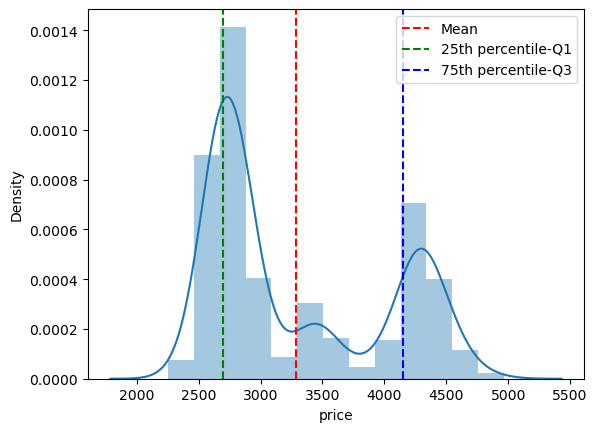

In [230]:
sns.distplot(df['price'])
plt.axvline(x=np.mean(df['price']),c='red',ls='--',label='Mean')
plt.axvline(x=np.percentile(df['price'],25),c='green',ls='--',label='25th percentile-Q1')
plt.axvline(x=np.percentile(df['price'],75),c='blue',ls='--',label='75th percentile-Q3')
plt.legend()

- From above distribution plot we can see that data is right skewed
- Also it is bimodal distribution

In [231]:
df['price'].describe().T

count    2182.000000
mean     3284.450046
std       719.564434
min      2252.600000
25%      2697.020000
50%      2879.800000
75%      4147.325000
max      4966.300000
Name: price, dtype: float64

In [232]:
# There are 2,182 observations in the data.
# The mean price is 3,284.45.
# The standard deviation of the price is 719.56.
# The minimum price is 2,252.60.
# The 25th percentile (i.e., the value below which 25% of the data falls) is 2,697.02.
# The median price is 2,879.80 (i.e., 50% of the data falls below this value).
# The 75th percentile (i.e., the value below which 75% of the data falls) is 4,147.33.
# The maximum price is 4,966.30.

<AxesSubplot:xlabel='price', ylabel='Count'>

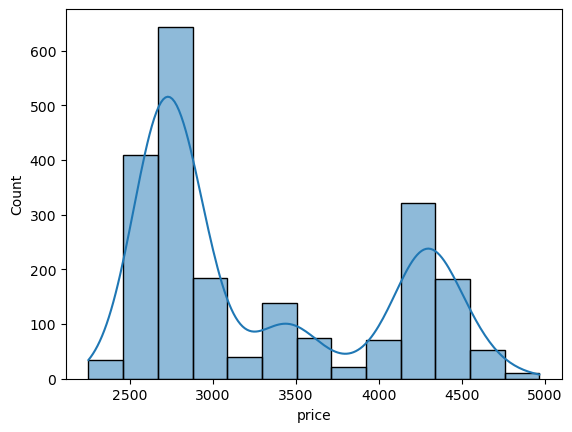

In [233]:
sns.histplot(df['price'],kde=True)

- The gold price values from 2600-2900 are most frequently occured ,the second most frequently occured values are between 4100 - 4400 

In [234]:
# Check for the outliers

<AxesSubplot:>

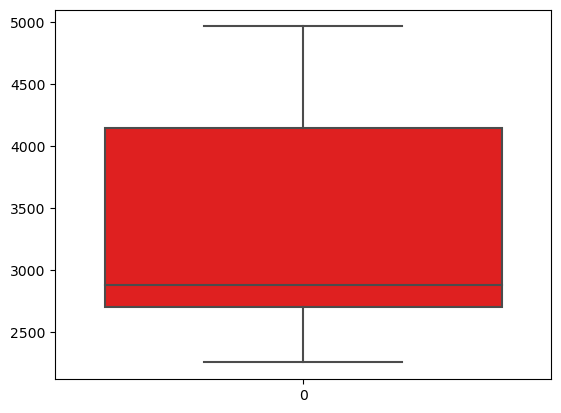

In [235]:
sns.boxplot(df['price'],color='red')

-  There are no outliers in data

In [236]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly in c:\users\lenovo\anaconda3\envs\tf\lib\site-packages (5.14.1)




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [237]:
import plotly.graph_objects as go

In [238]:
fig=go.Figure(data=go.Scatter(x=df['date'],y=df['price'],mode='lines'))
fig.show()

- Time Series Plots of Gold Price shows general movement of price data. 
- The Gold Price is generally increasing over the time. 

In [239]:
df['date']=pd.to_datetime(df['date'],errors='coerce')
df['Year']=df['date'].dt.year
df['Month']=df['date'].dt.month
df['Weekday']=df['date'].dt.weekday
df['Weekday']=np.where(df['Weekday']==0,7,df.Weekday)
df['Quarter']=df['date'].dt.quarter

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 1250x1020 with 7 Axes>,
 array([<AxesSubplot:ylabel='2016'>, <AxesSubplot:ylabel='2017'>,
        <AxesSubplot:ylabel='2018'>, <AxesSubplot:ylabel='2019'>,
        <AxesSubplot:ylabel='2020'>, <AxesSubplot:ylabel='2021'>],
       dtype=object))

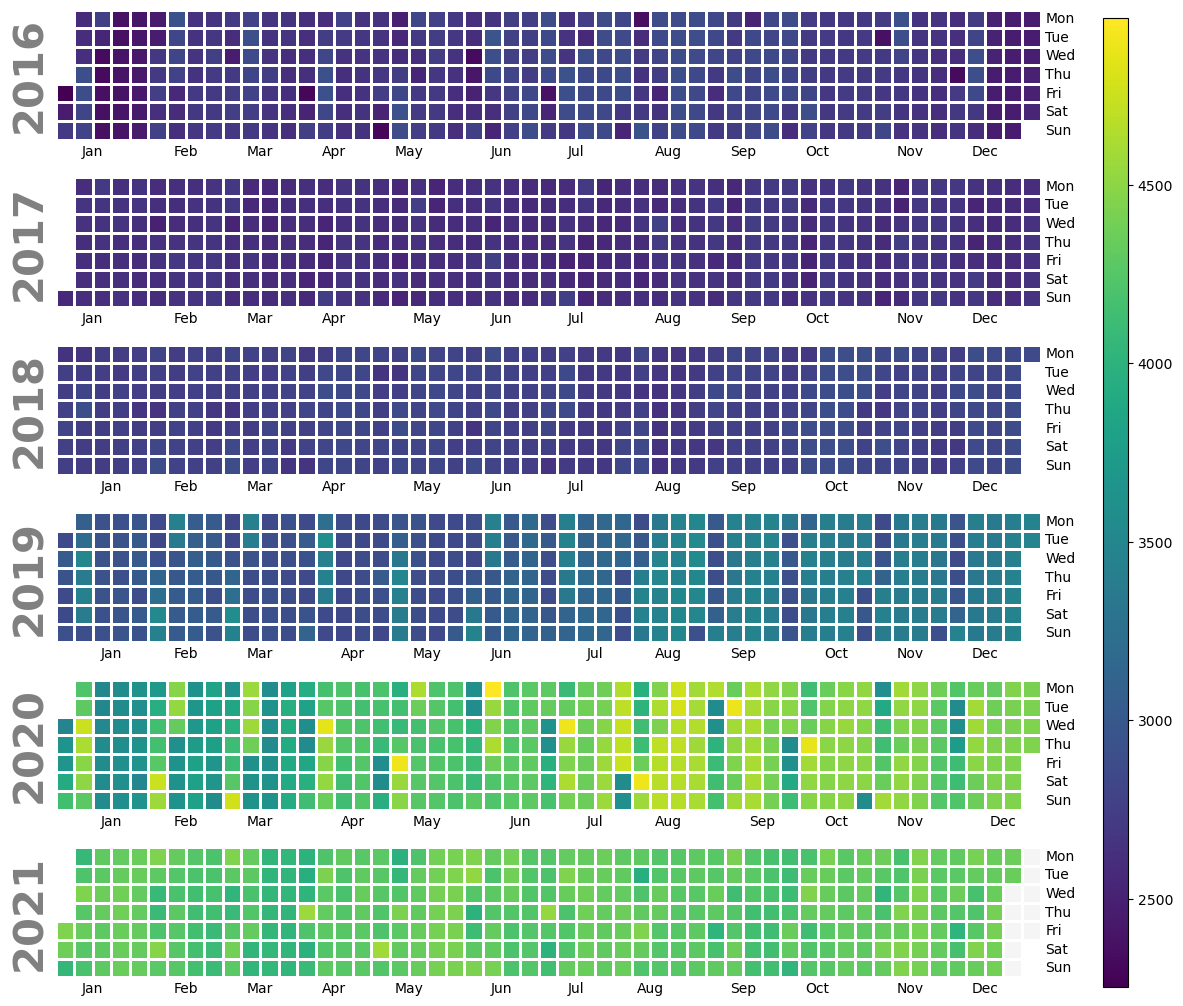

In [242]:
import calplot

data=df.copy()
data=data.set_index('date')

calplot.calplot(data['price'],edgecolor=None)

## From above plot we can conclude the gold prices are increasing 2016 to 2020
## In year 2020 the gold prices are very high , but in year 2021 the gold prices has decreased to some extent

In [ ]:
# There are no outliers in data

<AxesSubplot:xlabel='Year'>

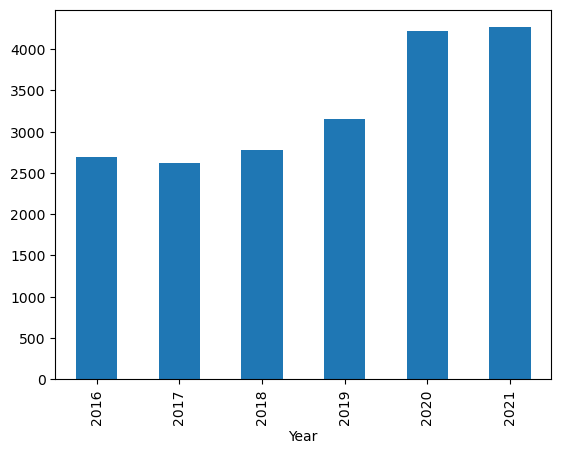

In [243]:
df_year=df.groupby('Year').mean()['price']
df_year.plot(kind='bar')

Text(0.5, 1.0, 'Month wise box plot \n (The Seasonality)')

<Figure size 1200x600 with 0 Axes>

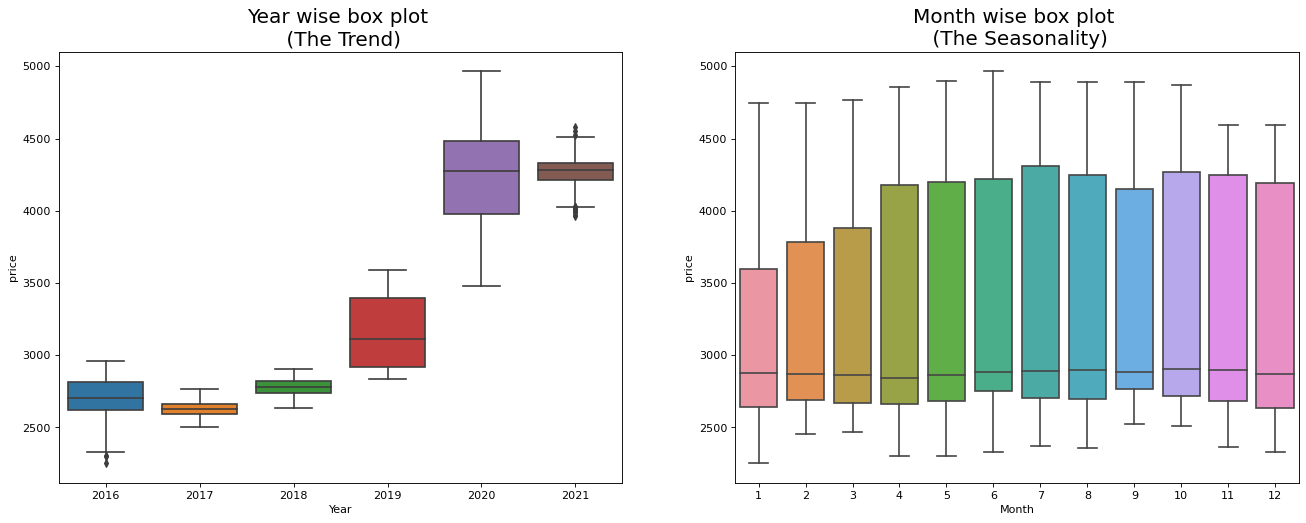

In [244]:
import seaborn as sns

fig=plt.figure(figsize=(12,6))
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=80)
sns.boxplot(x='Year',y='price',data=df,ax=axes[0])
sns.boxplot(x='Month',y='price',data=df,ax=axes[1])
axes[0].set_title('Year wise box plot \n (The Trend)',fontsize=18)
axes[1].set_title('Month wise box plot \n (The Seasonality)',fontsize=18)

In [245]:
df[df['Year']==2016]['price'].describe().T

count     366.000000
mean     2690.614162
std       146.639798
min      2252.600000
25%      2617.825000
50%      2704.750000
75%      2812.575000
max      2956.600000
Name: price, dtype: float64

In [246]:
df[df['Year']==2017]['price'].describe().T

count     365.000000
mean     2626.676484
std        50.634343
min      2506.500000
25%      2591.800000
50%      2625.100000
75%      2661.300000
max      2763.400000
Name: price, dtype: float64

In [247]:
df[df['Year']==2018]['price'].describe().T

count     365.000000
mean     2781.938082
std        60.387230
min      2637.900000
25%      2741.000000
50%      2778.400000
75%      2821.800000
max      2906.000000
Name: price, dtype: float64

In [248]:
df[df['Year']==2019]['price'].describe().T

count     365.000000
mean     3150.210685
std       236.765777
min      2832.700000
25%      2915.900000
50%      3115.100000
75%      3394.700000
max      3590.400000
Name: price, dtype: float64

In [249]:
df[df['Year']==2020]['price'].describe().T

count     366.000000
mean     4216.378689
std       362.345350
min      3477.600000
25%      3977.100000
50%      4276.900000
75%      4485.600000
max      4966.300000
Name: price, dtype: float64

In [250]:
df[df['Year']==2021]['price'].describe().T

count     355.000000
mean     4266.871549
std       113.907651
min      3965.300000
25%      4209.750000
50%      4282.800000
75%      4332.800000
max      4580.300000
Name: price, dtype: float64

- From the year 2017 to 2020 the gold increasing which has clear upward trend
- In the year 2016 and 2021 there are lot of outliers particularly in 2021 so they hard to interpret with central values such as   mean ,by comparing with median values of 2020 and 2021 we can observe that there is no much increase in gold price in year 2021
- As year passed the prices of gold are increased but in year in 2020 and 2021 and price fluctuation are more

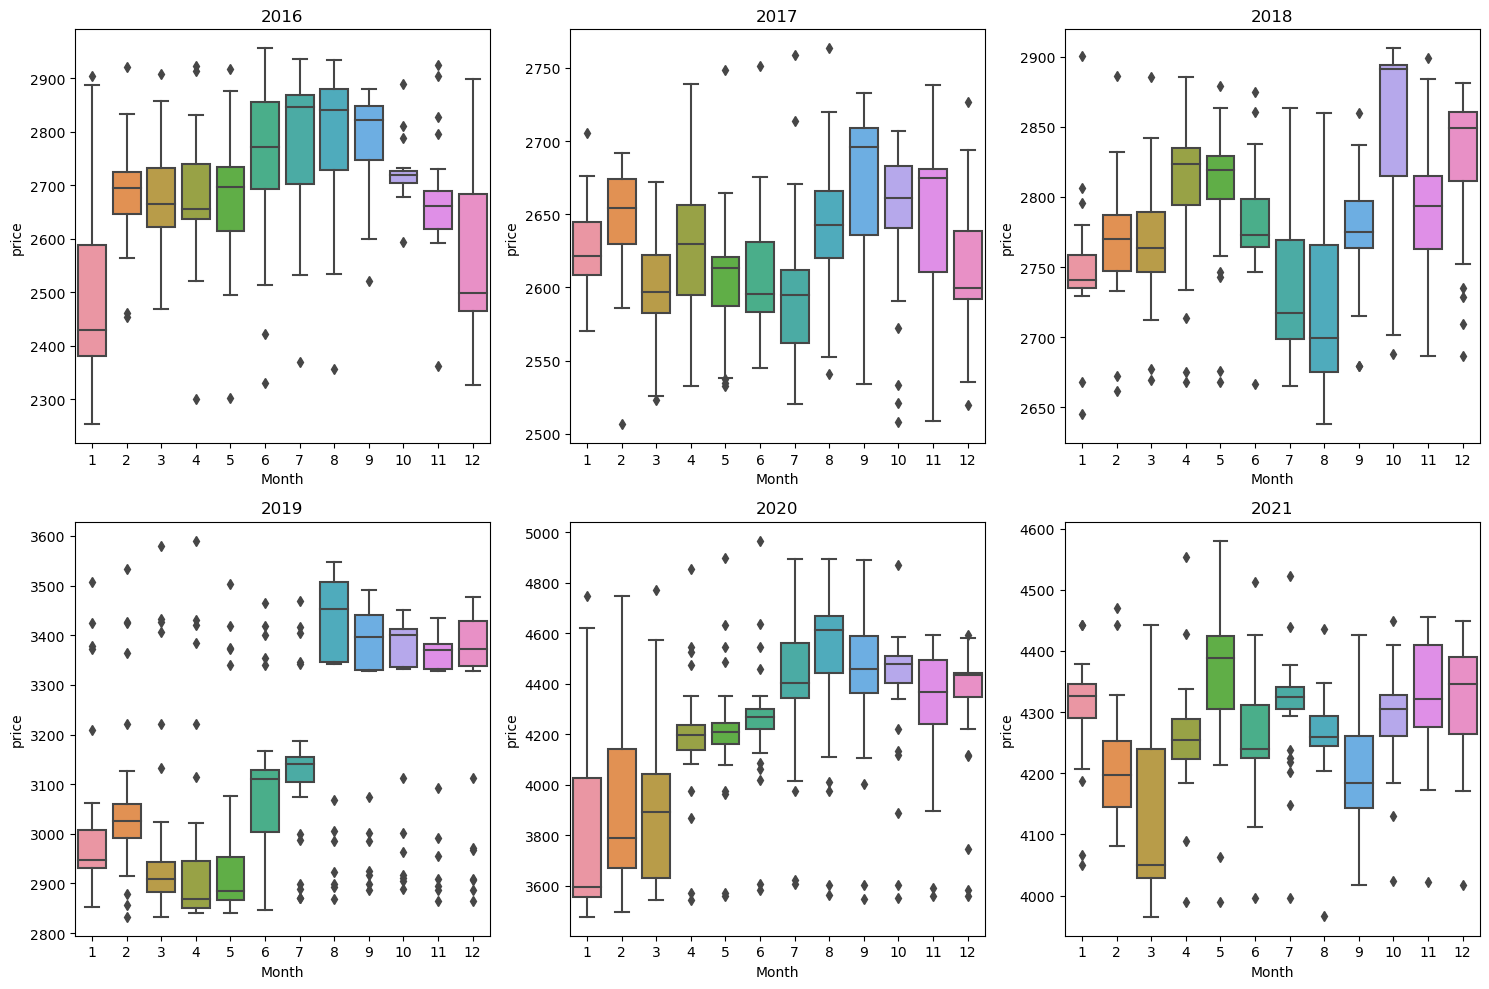

In [251]:
#df['year'] = df.index.Year
# create 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# loop through each year and create a boxplot for each month
for i, year in enumerate(df['Year'].unique()):
    data = df[df['Year'] == year].reset_index()
    sns.boxplot(x='Month', y='price', data=data, ax=axs[i])
    axs[i].set_title(str(year))
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('price')

plt.tight_layout()
plt.show()

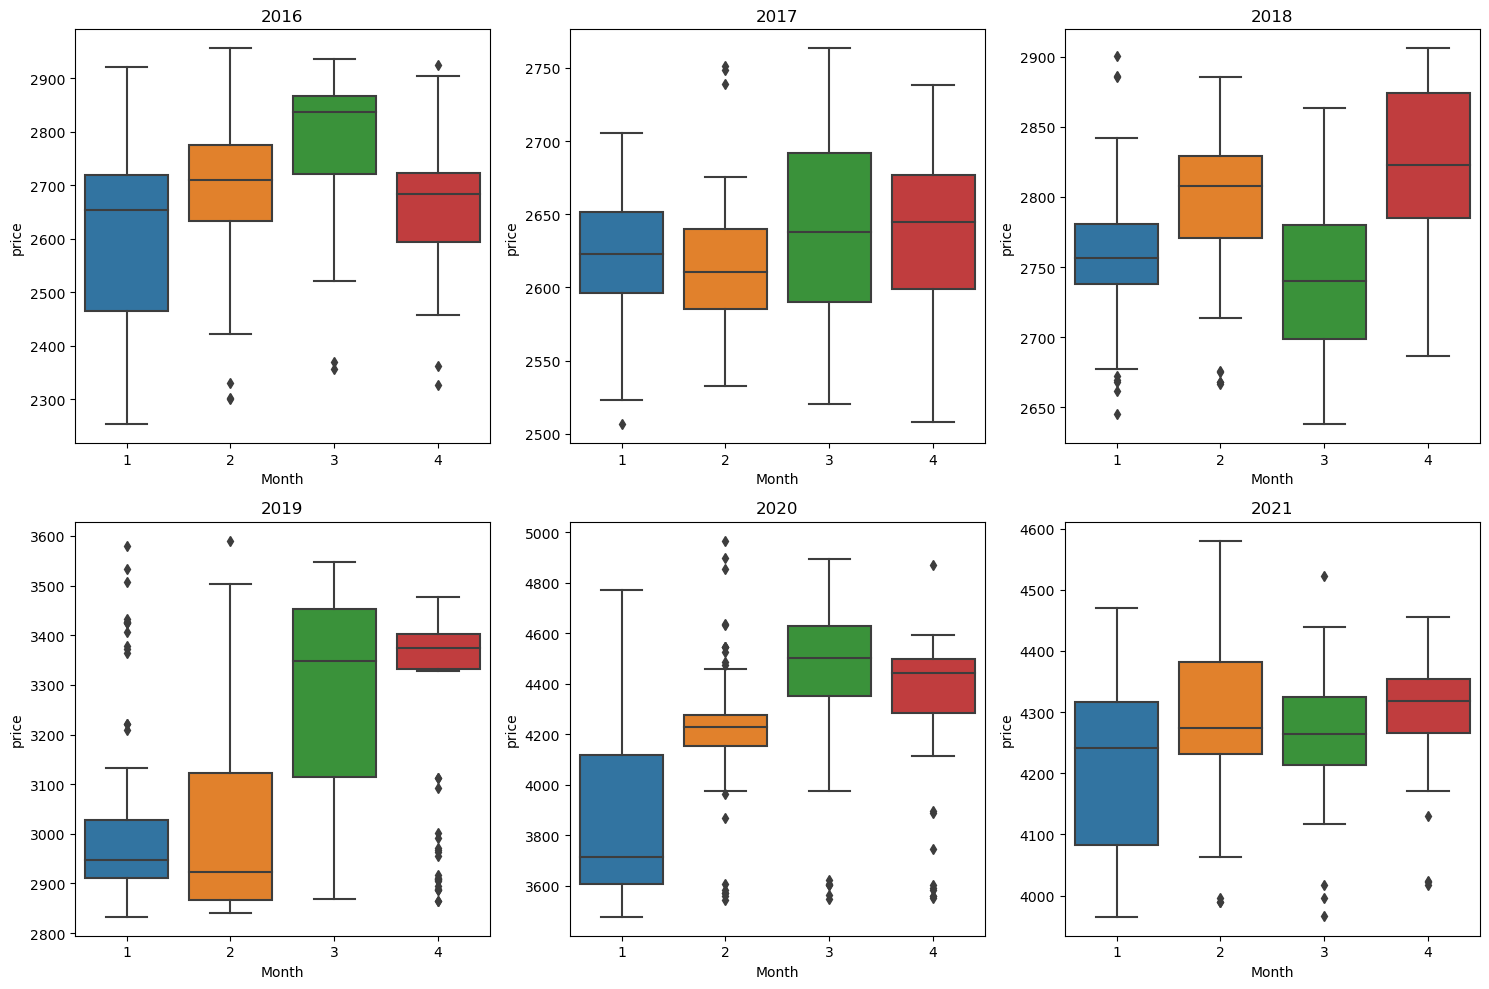

In [252]:
#df['year'] = df.index.Year
# create 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# loop through each year and create a boxplot for each month
for i, year in enumerate(df['Year'].unique()):
    data = df[df['Year'] == year].reset_index()
    sns.boxplot(x='Quarter', y='price', data=data, ax=axs[i])
    axs[i].set_title(str(year))
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('price')

plt.tight_layout()
plt.show()

# Time Series components

- For selecting forecasting methods, the time series can be broken down into systematic and unsystematic components. 
- A time series is composed of three systematic components including 'level', 'trend', 'seasonality', and one non-systematic component called 'noise'. The four components can be either additively or multiplicatively combined. The components in our dataset can be visually evaluated through the decomposition plots in the next section

In [253]:
from statsmodels.tsa.seasonal import seasonal_decompose

# read in the time series data
df1=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\gold forecasting\\Gold_data.csv", parse_dates=['date'], index_col='date')
result = seasonal_decompose(df1, model='multiplicative',period=30)

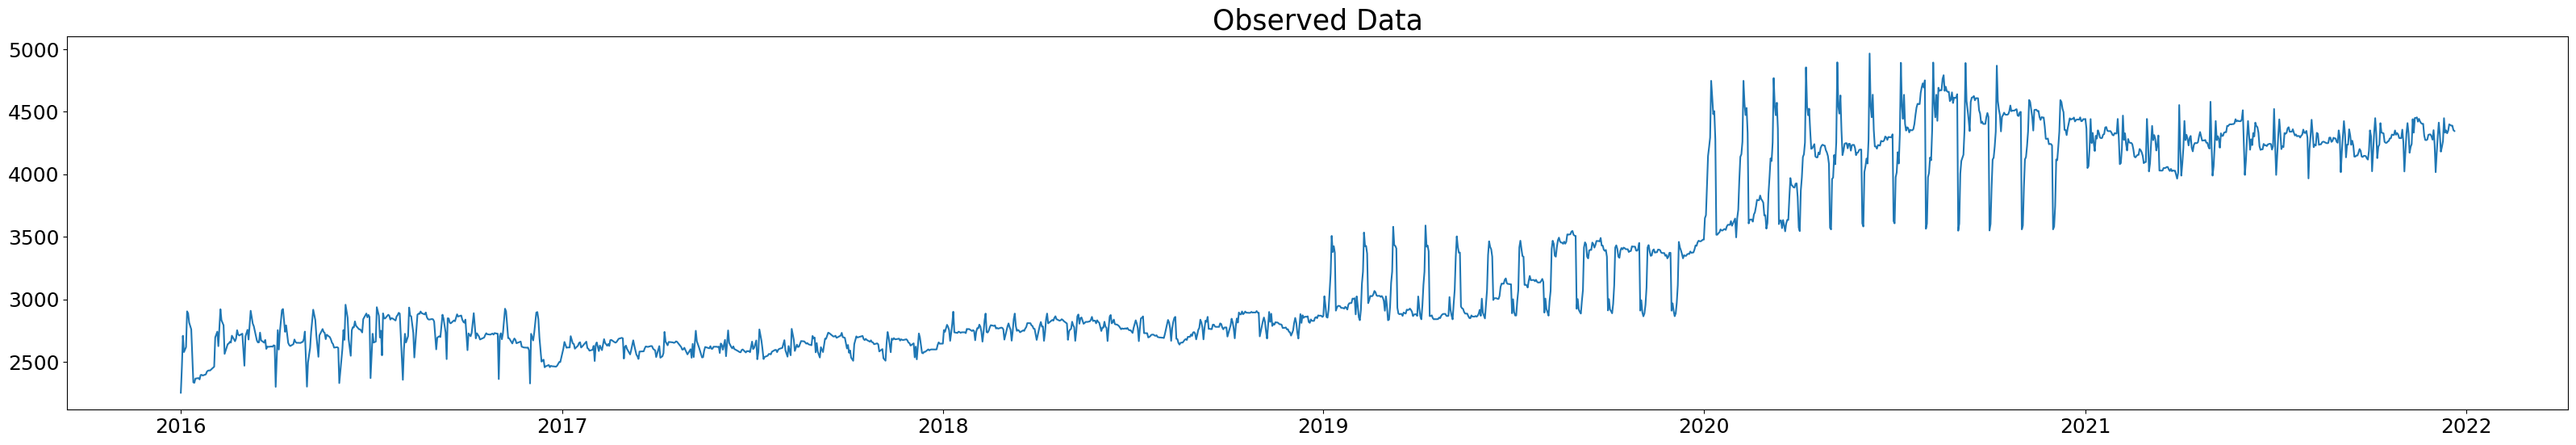

In [254]:
fig=plt.figure(figsize=(40,6))
fig,plt.plot(result.observed)
plt.title('Observed Data',size=25)
plt.yticks(size=18)
plt.xticks(size=18);

- From above plot it shows the observed values of Gold price from 2016 to 2021

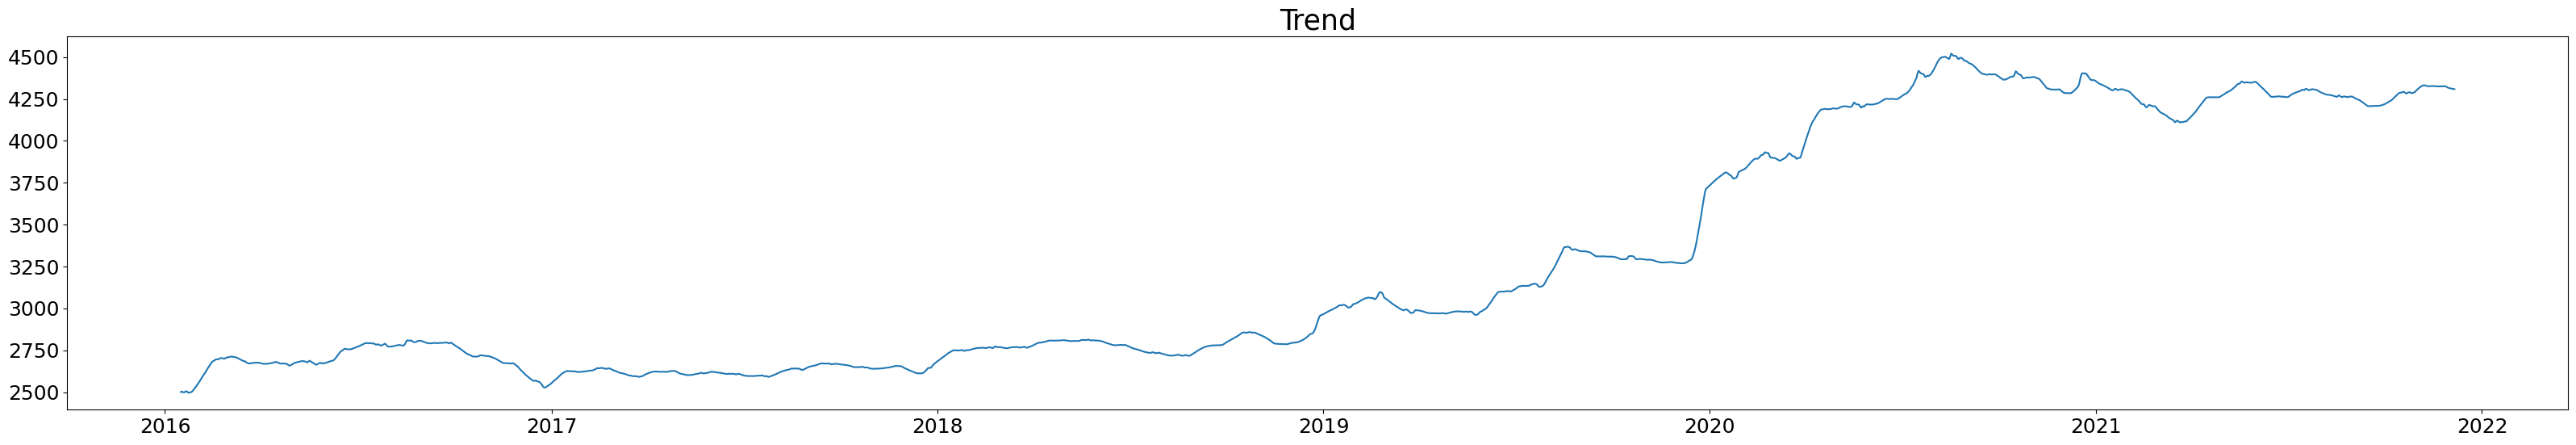

In [255]:
fig=plt.figure(figsize=(40,6))
fig,plt.plot(result.trend)
plt.title('Trend',size=25)
plt.yticks(size=18)
plt.xticks(size=18);

- In above plot, since the trend of the data from 2016 to 2019 is almost constant but changes from 2019 to 2021, it can be considered a changing trend. Specifically, it would be an increasing trend from 2019 to 2021.

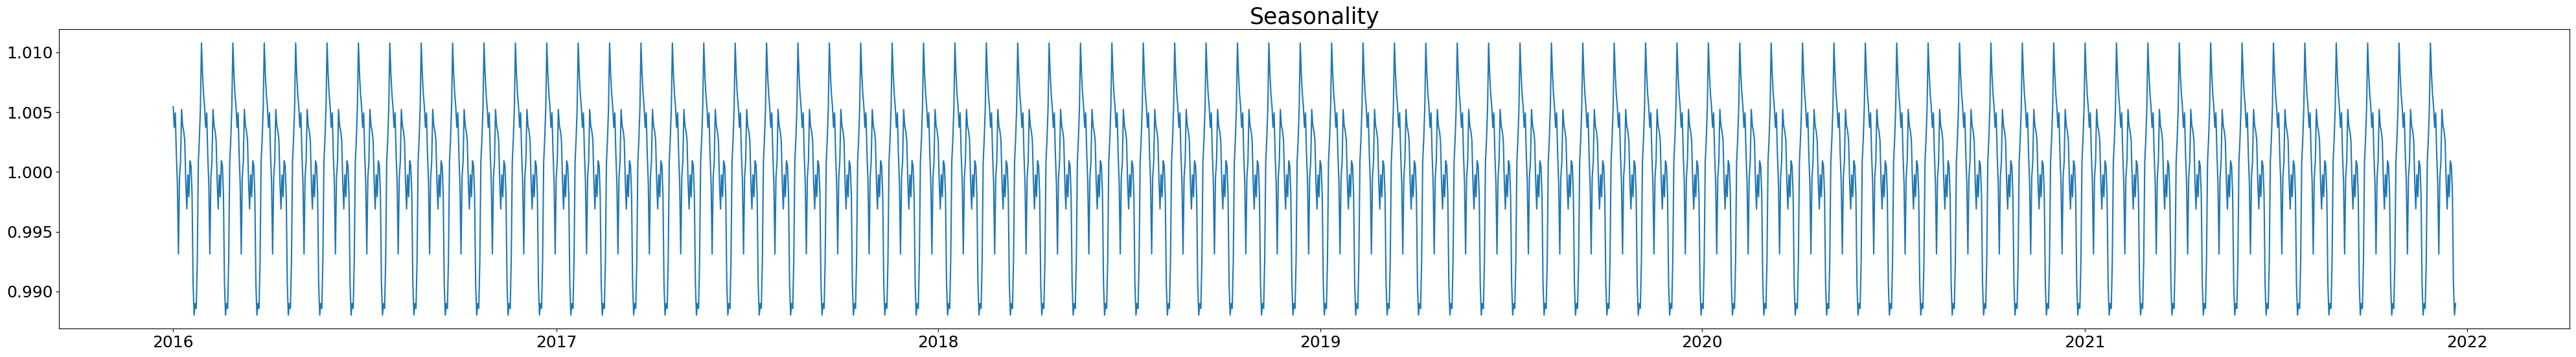

In [256]:
fig=plt.figure(figsize=(50,6))
fig,plt.plot(result.seasonal)
plt.title('Seasonality',size=25)
plt.yticks(size=18)
plt.xticks(size=18);

- If the seasonal component is relatively constant in magnitude over time, the data likely has additive seasonality. 

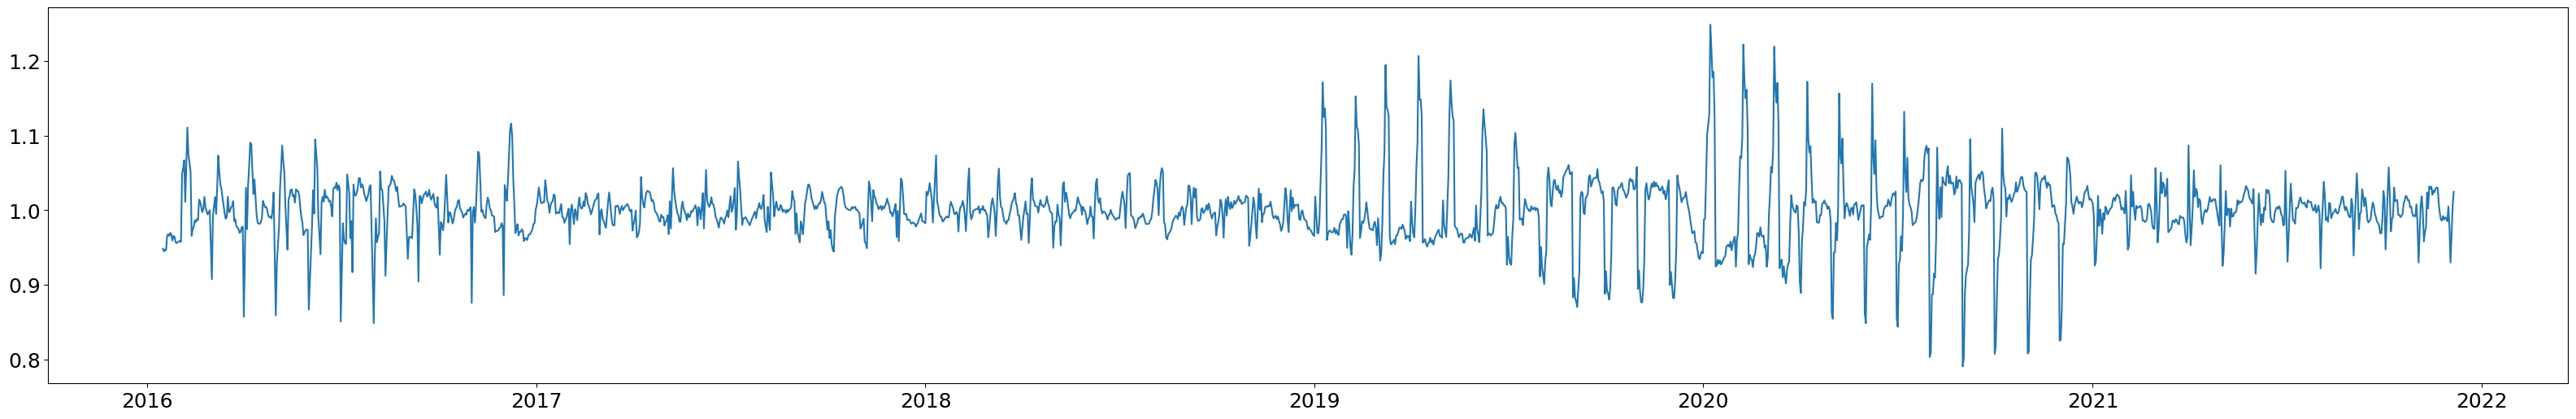

In [257]:
fig=plt.figure(figsize=(40,6))
fig,plt.plot(result.resid)
plt.yticks(size=18)
plt.xticks(size=18);

- If the residuals have more magnitude from 2019 to 2021 compared to previous years, it suggests that there might be some unexplained variability or noise in the data that the decomposition was not able to capture. 
- This could be due to external factors such as economic conditions or natural disasters(Covid) that are not accounted for in the time series.

In [258]:
# The residuals in time series analysis are the differences between the observed values and the predicted values.
# In seasonal decomposition, the predicted values are the sum of the trend, seasonal, and optionally, the residual component.
# Therefore, the residuals in seasonal decomposition are the differences between the observed values and the sum of the trend, seasonal, and residual components.

# Lag plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

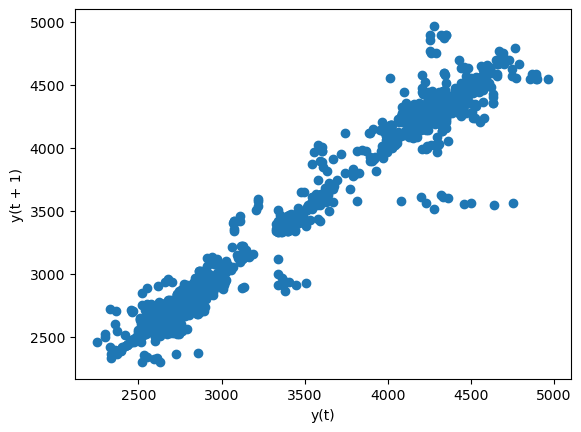

In [259]:
from pandas.plotting import lag_plot
lag_plot(df.price)

- From above plot we can see the sales at y(t) is linearly correlated with y(t+1) prior prices of gold

### We can check stationarity using the following
- ACF and PACF plots: If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
- Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.
- Augmented Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

# ACF and PACF plots

- Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots
- If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
- This data is non-stationary as a high number of previous observations are correlated with future values.
Confidence intervals are drawn as a cone.
- By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
- The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

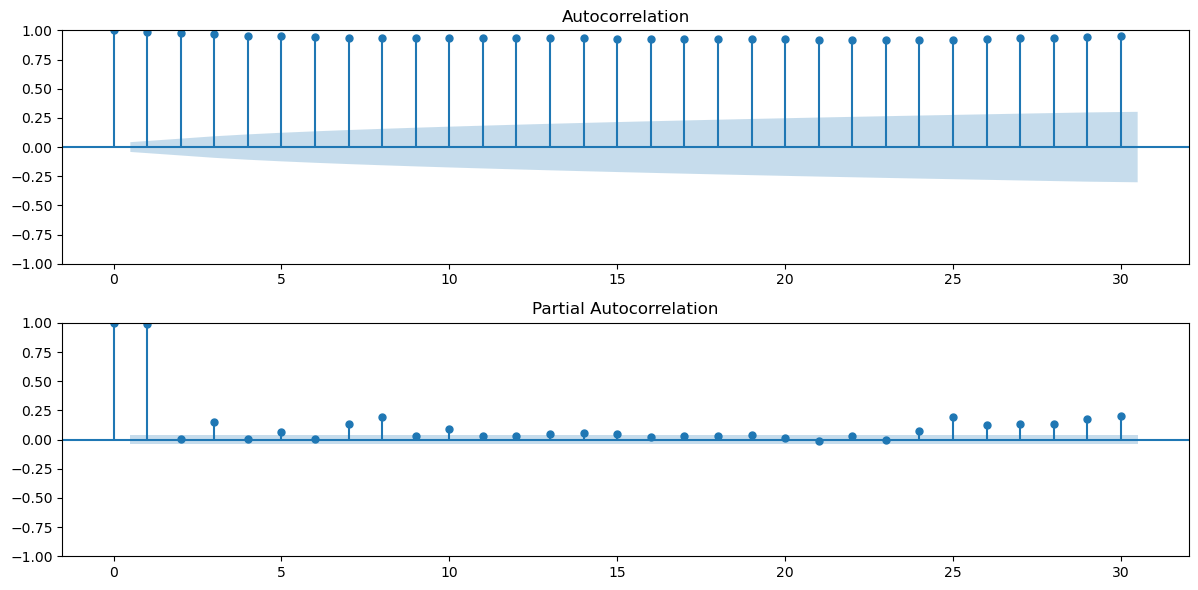

In [260]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,6))
plt.subplot(211)
plot_acf(df1.price, ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(df1.price, ax=plt.gca(), lags = 30)
plt.tight_layout()
plt.show()

- From the above for ACF plot we can see that the lines are above the standard error which expalins the lags k = 210 are positively correlated with current observation and after that drop off takes place so we can predict the prices atleast for 7 month with some amount of accuracy
- In pacf plots it explains the direct effect of the lags with current observation,after first lag we can see some lags are getting drop off in standard error and further some are above and below the standrad error.
- if the ACF plot shows that significant lags drop off after k=210, then a good starting point for the MA order would be q=210. And if the PACF plot shows that significant lags drop off after some point, then a good starting point for the AR order would be p=1 that point.(we could vary these lags till we get improved accuracy)
-  ACF measures the direct and indirect effects of all lags on the current observation, while PACF measures only the direct effect of a particular lag on the current observation. 

# Plotting Rolling Statistics

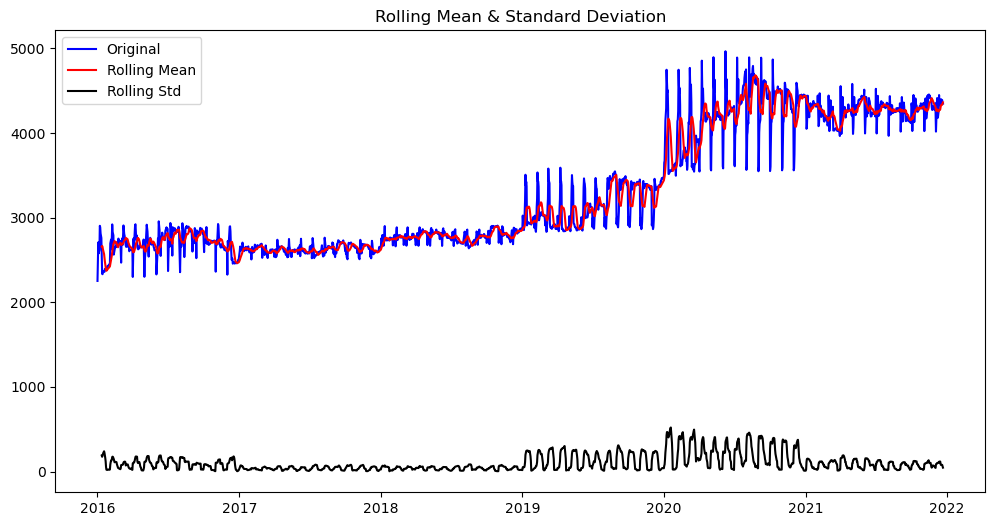

In [261]:
#Determing rolling statistics
window=12
rolmean = df1.rolling(window).mean()
rolstd = df1.rolling(window).std()

#Plot rolling statistics:
plt.figure(figsize=(12,6))
orig = plt.plot(df1, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
- The time series is hence not stationary

# Augmented Dickey-Fuller Test

- The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1) will provide no relevant information in predicting the change in y(t).
- Null hypothesis: The time series is not stationary
- Rejecting the null hypothesis (i.e. a very low p-value) will indicate staionarity

In [262]:
from statsmodels.tsa.stattools import adfuller

In [263]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df1.price, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -0.309904
p-value                           0.924090
#Lags Used                       26.000000
Number of Observations Used    2155.000000
Critical Value (1%)              -3.433388
Critical Value (5%)              -2.862882
Critical Value (10%)             -2.567484
dtype: float64


### P-value is greater than 0.05,so we cannot reject the null hypothesis so the data is non-stationary

## Lets Create the function to check the statianarity

In [264]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=90).mean()
    rolstd = timeseries.rolling(window=90).std()

    #Plot rolling statistics:
    plt.figure(figsize=(12,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

## Making Time Series Stationary
#### There are 2 major reasons behind non-stationaruty of a TS:
- Trend – varying mean over time. For eg, in this case we saw that on average, the gold price was growing over time.
- Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.
- when the goal is to identify underlying trends or long-term patterns in the data, it may be more appropriate to remove seasonal components in order to better see these underlying patterns.
- The decision to remove or keep seasonal components will depend on the specific goals of the analysis and the nature of the data being analyzed.

## Transformations
- We can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root,Also these transformations helps us to removes seasonal components. Lets take a log transform here for simplicity:

- Log Scale Transformation
- Exponential tranformation
- Box Cox transformation
- Square root transformation

# Log Scale Transformation

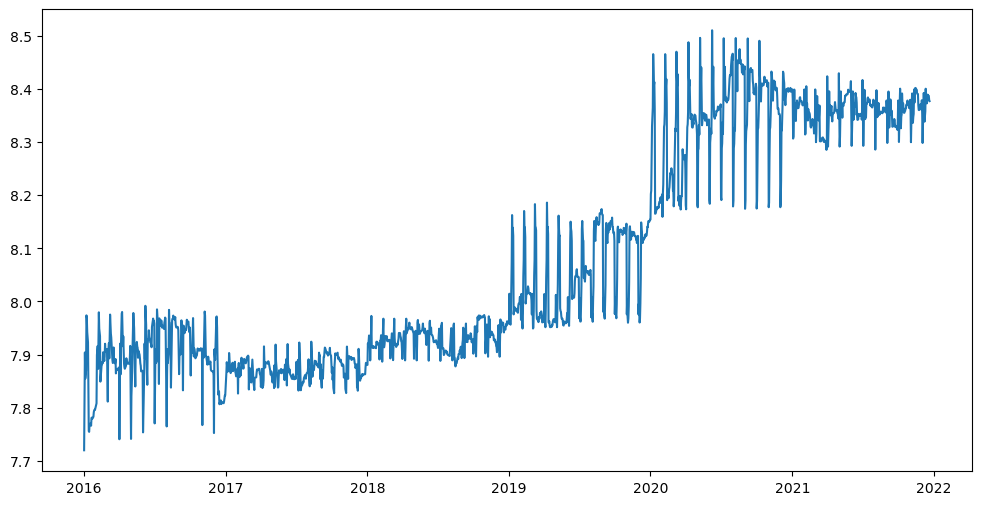

In [265]:
plt.figure(figsize=(12,6))
ts_log = np.log(df1)
plt.plot(ts_log)

# Techniques to remove Trend - Smoothing
- Smoothing is taking rolling averages over windows of time

# Moving Average


- Moving Average or Rolling mean is a technique used to smoothen the time series data by reducing the short-term fluctuations or noise.
- Short-term fluctuations in time series data refer to random, short-lived variations in the data that are not part of a consistent pattern or trend. These fluctuations are often caused by factors such as random events, measurement errors, or other sources of variability that affect the data.
- A drawback in this particular approach is that the time-period has to be strictly defined.

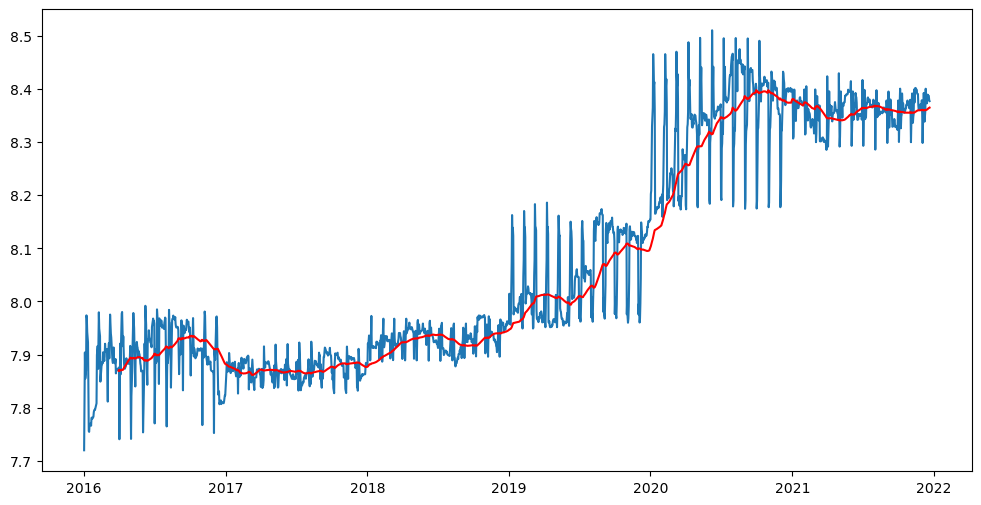

In [266]:
moving_avg = ts_log.rolling(window=90).mean()
plt.figure(figsize=(12,6))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [267]:
ts_log_moving_avg_diff = ts_log.price - moving_avg.price
#ts_log_moving_avg_diff.head(50)

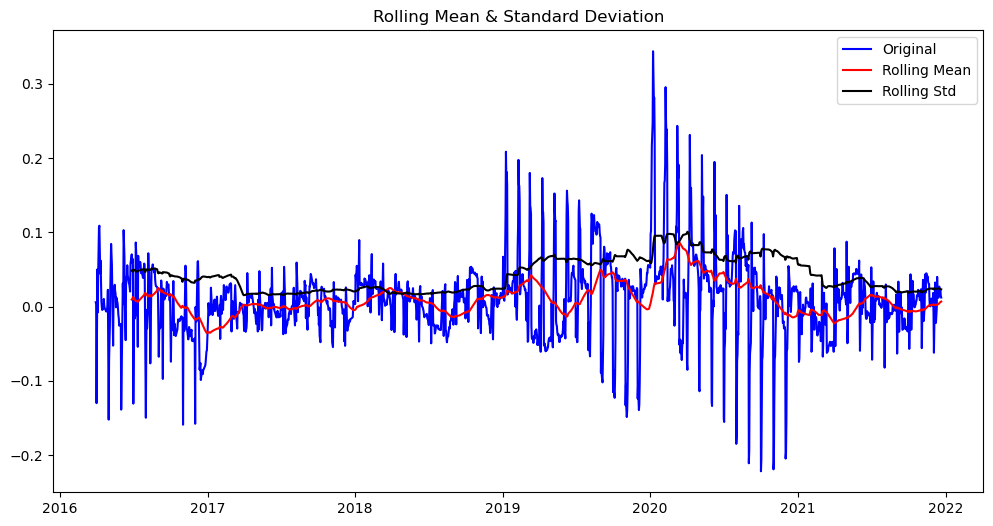

Results of Dickey-Fuller Test:
Test Statistic                   -4.795076
p-value                           0.000056
#Lags Used                       26.000000
Number of Observations Used    2066.000000
Critical Value (1%)              -3.433519
Critical Value (5%)              -2.862940
Critical Value (10%)             -2.567515
dtype: float64


In [269]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

- After taking the log transformation of the original time series data, we compute the moving average of the log-transformed values. The purpose of this is to smoothen the data and remove some of the noise or short-term fluctuations.
- Taking the first-order difference of the log-transformed moving average series helps to remove the remaining trend and seasonality in the data.
- The resulting differenced series is more stationary and suitable for modeling using techniques such as ARIMA.

## Exponentially weighted moving average:
- To overcome the problem of choosing a defined window in moving average, we can use exponential weighted moving average
- We take a ‘weighted moving average’ where more recent values are given a higher weight.
- There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

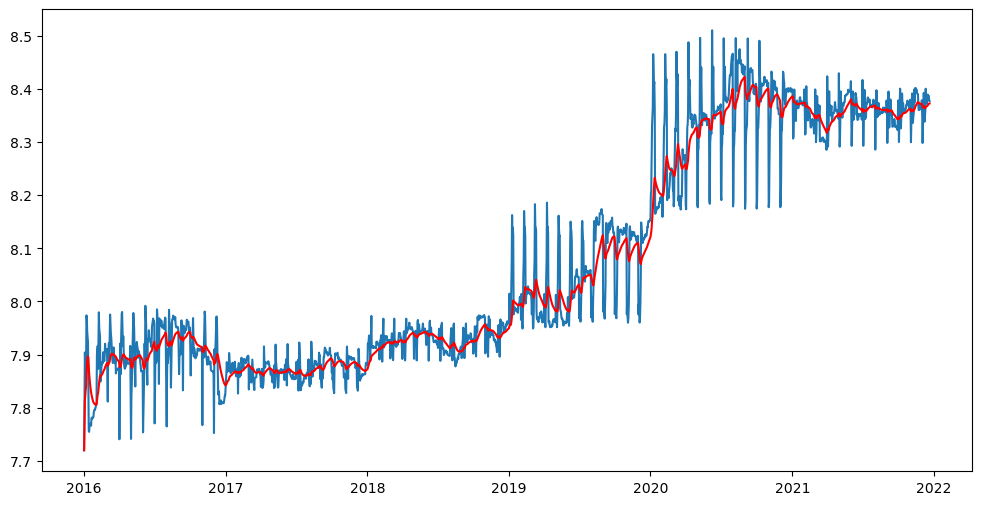

In [270]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.figure(figsize=(12,6))
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

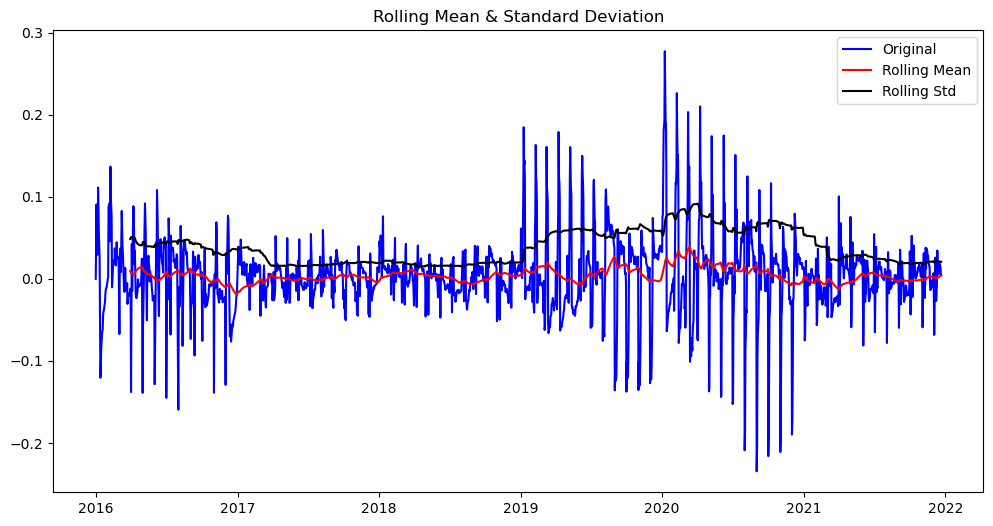

Results of Dickey-Fuller Test:
Test Statistic                -8.814977e+00
p-value                        1.945338e-14
#Lags Used                     2.600000e+01
Number of Observations Used    2.155000e+03
Critical Value (1%)           -3.433388e+00
Critical Value (5%)           -2.862882e+00
Critical Value (10%)          -2.567484e+00
dtype: float64


In [271]:
ts_log_ewma_diff = ts_log.price - expwighted_avg.price
test_stationarity(ts_log_ewma_diff)

## Further Techniques to remove Seasonality and Trend
- The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality.

## Differencing
- In this technique, we take the difference of the observation at a particular instant with that at the previous instant.
First order differencing in Pandas

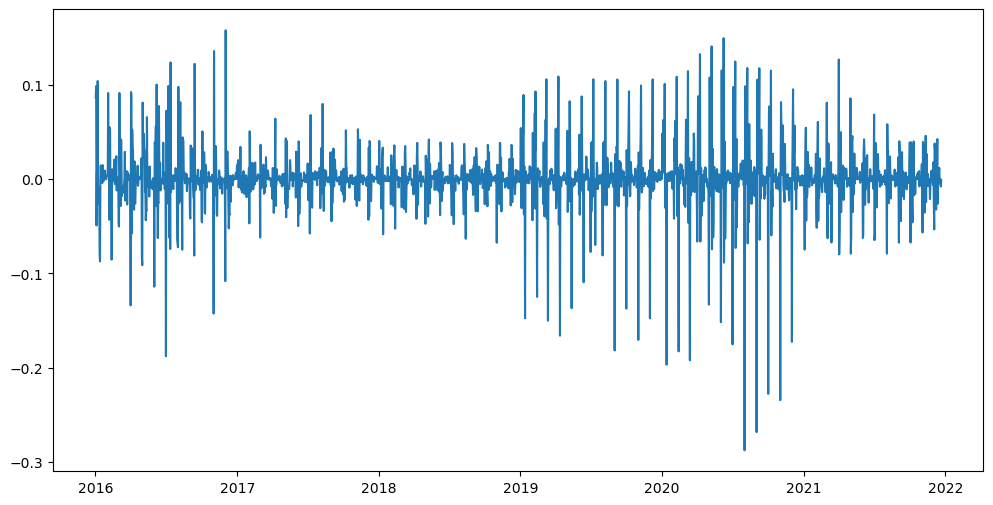

In [272]:
ts_log_diff = ts_log.price - ts_log.price.shift()
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)

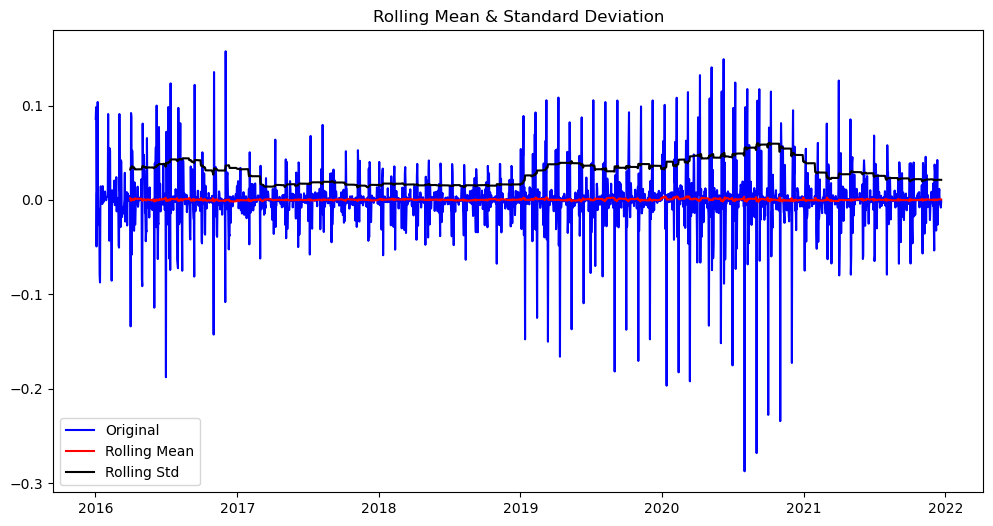

Results of Dickey-Fuller Test:
Test Statistic                  -21.394232
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    2154.000000
Critical Value (1%)              -3.433390
Critical Value (5%)              -2.862883
Critical Value (10%)             -2.567485
dtype: float64


In [273]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

- From above plot we could see that the trend and seasonality got smootened by using  differencing method,since p-values is less than the 0.05 we can conclude that the the data is stationary

### Observation
- 1.We can see that there is no trend (upward or downward) after differencing on the Box Cox transformation.

- 2.It is a horizontal trend.

- 3.The mean became constant. The mean is zero.

- 4.Also, the variance is little constant.

- Lets test the Stationarity again.


In [ ]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

## Time Series forecasting

### Autoregression (AR)
- The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.
Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

### Autoregressive Integrated Moving Average (ARIMA)
- In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

- Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- Number of Differences (d): d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
- Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

In [428]:
from statsmodels.tsa.ar_model import AutoReg

In [433]:
# fit model
model = AutoReg(ts_log_diff,lags=33)
model_fit = model.fit()

In [434]:
model_fit.fittedvalues

date
2016-02-04   -0.019932
2016-02-05   -0.009809
2016-02-06    0.026120
2016-02-07    0.055101
2016-02-08    0.004893
                ...   
2021-12-17   -0.003631
2021-12-18   -0.003329
2021-12-19    0.000692
2021-12-20   -0.001294
2021-12-21    0.002462
Length: 2148, dtype: float64

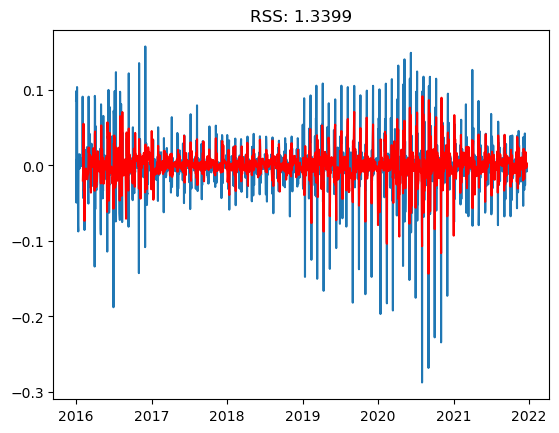

In [435]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))
plt.show()

In [436]:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

date
2016-02-04   -0.019932
2016-02-05   -0.009809
2016-02-06    0.026120
2016-02-07    0.055101
2016-02-08    0.004893
dtype: float64


In [437]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

date
2016-02-04   -0.019932
2016-02-05   -0.029741
2016-02-06   -0.003621
2016-02-07    0.051480
2016-02-08    0.056373
dtype: float64


In [444]:
predictions_AR_log = pd.Series(ts_log.price.iloc[0], index=ts_log.index)
predictions_AR_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_AR_log.head()

date
2016-01-01    7.71984
2016-01-02    7.71984
2016-01-03    7.71984
2016-01-04    7.71984
2016-01-05    7.71984
dtype: float64

In [445]:
predictions_AR = np.exp(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 1252.5219')

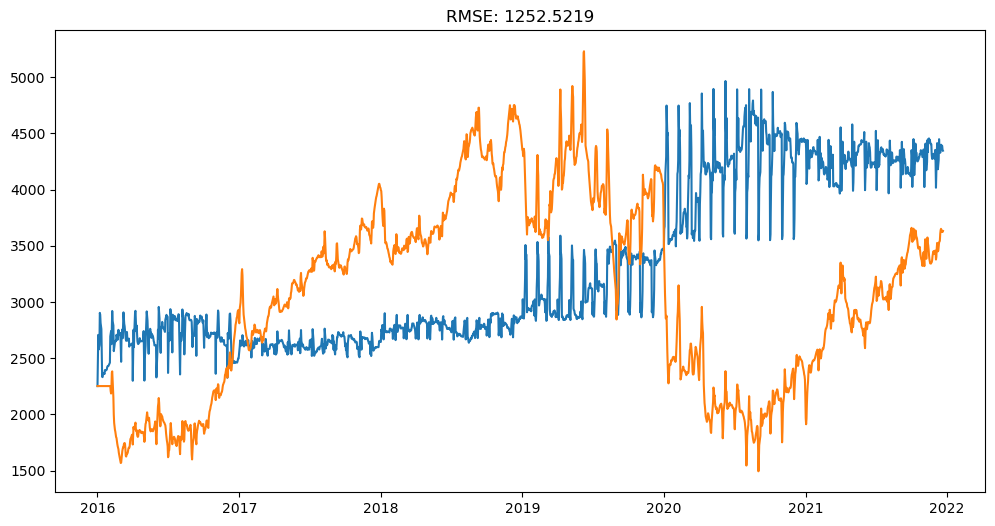

In [447]:
plt.figure(figsize=(12,6))
plt.plot(df1.price)
plt.plot(predictions_AR)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_AR-df1.price)**2)/len(df1.price)))

In [451]:
res=pd.DataFrame(evaluate_forecast(df1.price[2000:], predictions_ARIMA[2000:])).rename(index={0:'Auto Regression'})
res

r2_score  mean_absolute_error  median_absolute_error  \
Auto Regression -105.207158           945.830254             942.346019   

                           mse      msle      mape        rmse  
Auto Regression  937370.430723  0.066694  0.220646  968.178925

### ACF and PACF plots after differencing:

- Confidence intervals are drawn as a cone.
- By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
- AR(1) process -- has ACF tailing out and PACF cutting off at lag=1
- AR(2) process -- has ACF tailing out and PACF cutting off at lag=2
- MA(1) process -- has ACF cut off at lag=1
- MA(2) process -- has ACF cut off at lag=2

In [349]:
from matplotlib import pyplot

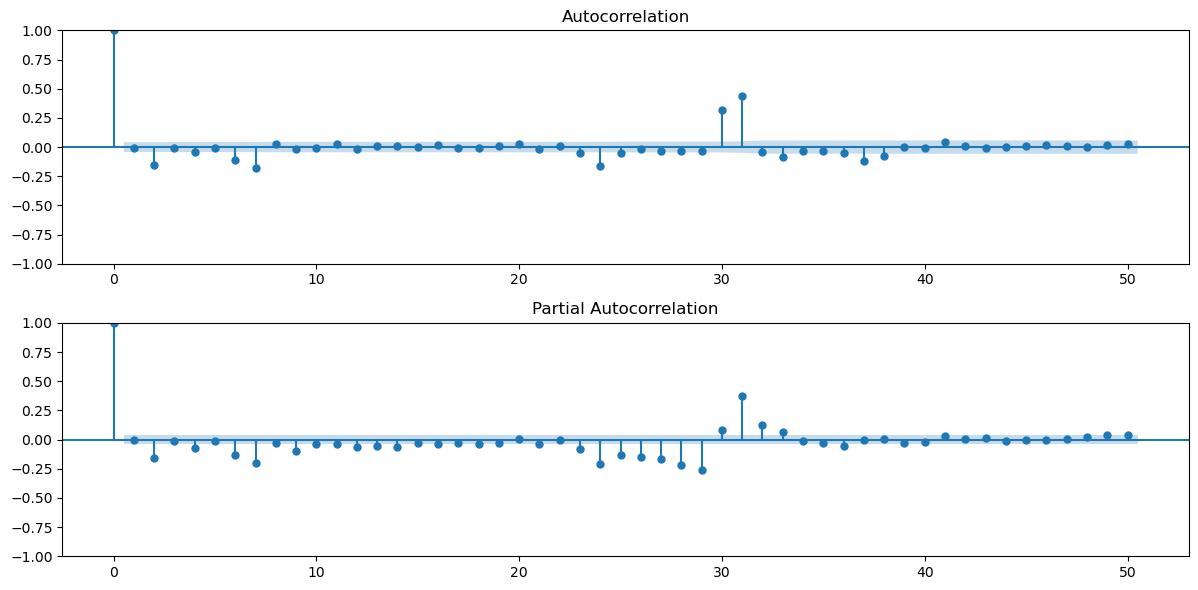

In [350]:
pyplot.figure(figsize=(12,6))
pyplot.subplot(211)
plot_acf(ts, ax=pyplot.gca(),lags=50)
pyplot.subplot(212)
plot_pacf(ts, ax=pyplot.gca(),lags=50)
pyplot.tight_layout()
pyplot.show()

<AxesSubplot:xlabel='date'>

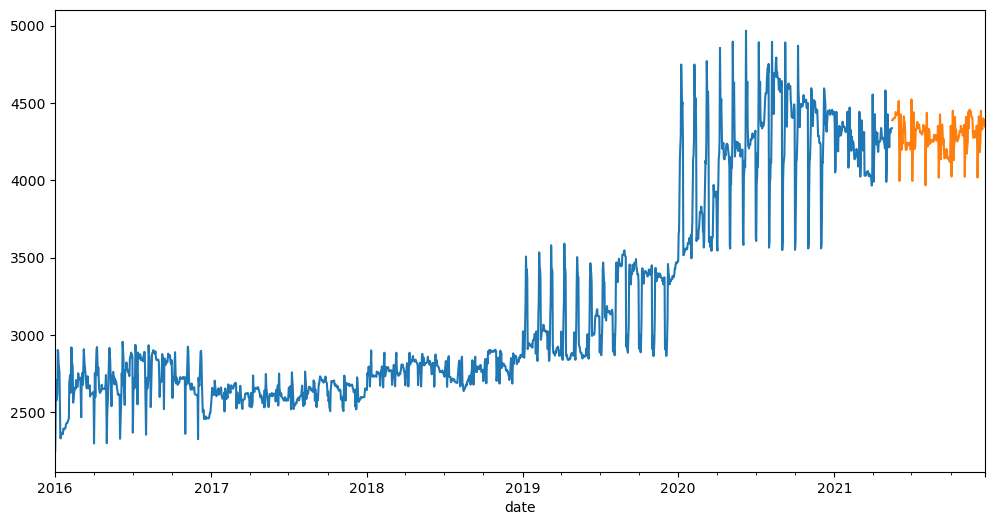

In [456]:
#divide into train and validation set
train = df1[:int(0.9*(len(df1)))]
valid = df1[int(0.9*(len(df1))):]

#plotting the data
pyplot.figure(figsize=(12,6))
train['price'].plot()
valid['price'].plot()

In [457]:
# ARIMA 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
model = ARIMA(train, order=(1, 0, 2))
model_fit = model.fit()

In [458]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1963
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -12092.926
Date:                Thu, 18 May 2023   AIC                          24195.851
Time:                        20:29:11   BIC                          24223.762
Sample:                    01-01-2016   HQIC                         24206.109
                         - 05-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3172.3031    236.209     13.430      0.000    2709.341    3635.265
ar.L1          0.9898      0.003    295.127      0.000       0.983       0.996
ma.L1         -0.0037      0.019     -0.197      0.844      -0.040       0.033
ma.L2         -0.1652      0.018     -9.058      0.000      -0.201      -0.129
sigma2      1.307e+04    150.057     87.117      0.000    1.28e+04    1.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             41397.46
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.86   Skew:                            -1.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [463]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
arima_pred = model_fit.predict(start=start_index, end=end_index)

In [464]:
# report performance
mse = mean_squared_error(valid.price,arima_pred)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 719.377233551421, MSE:517503.6041520958


In [465]:
arima_pred

2021-05-17    4321.312380
2021-05-18    4306.728879
2021-05-19    4295.180441
2021-05-20    4283.749566
2021-05-21    4272.435058
                 ...     
2021-12-17    3300.610955
2021-12-18    3299.304782
2021-12-19    3298.011907
2021-12-20    3296.732193
2021-12-21    3295.465506
Freq: D, Name: predicted_mean, Length: 219, dtype: float64

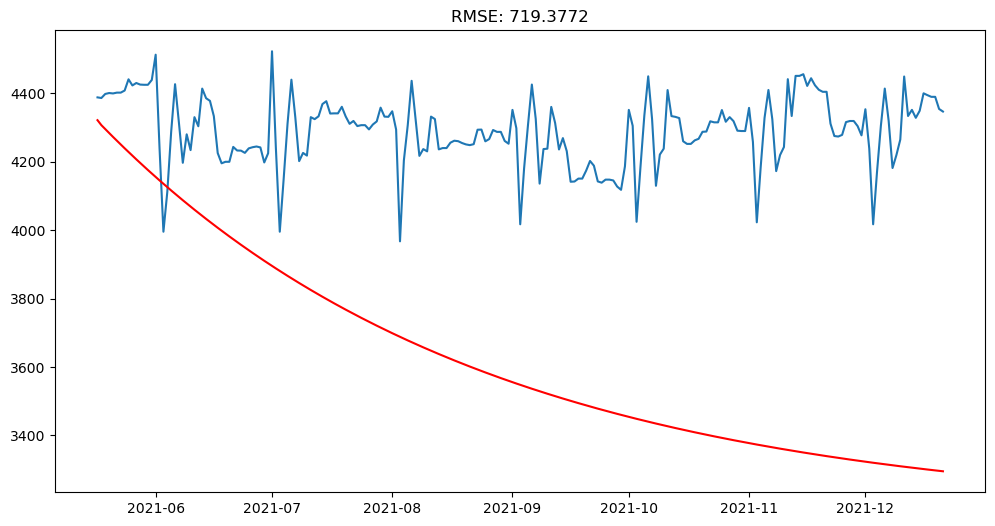

In [466]:
plt.figure(figsize=(12,6))
plt.plot(valid.price)
plt.plot(arima_pred, color='red')
plt.title('RMSE: %.4f'% rmse)
plt.show()

In [468]:
res=res.append(evaluate_forecast(valid.price,arima_pred))
res.rename(index={0:'Arima'},inplace=True)
res

r2_score  mean_absolute_error  median_absolute_error  \
Auto Regression -105.207158           945.830254             942.346019   
Arima            -52.394838           659.370802             675.321168   
Arima            -52.394838           659.370802             675.321168   

                           mse      msle      mape        rmse  
Auto Regression  937370.430723  0.066694  0.220646  968.178925  
Arima            517503.604152  0.034673  0.153463  719.377234  
Arima            517503.604152  0.034673  0.153463  719.377234

## Seasonal Autoregressive Integrated Moving-Average (SARIMA)
- Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

- It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

## Trend Elements:

- There are three trend elements that require configuration. They are the same as the ARIMA model, specifically:

- p: Trend autoregression order.
- d: Trend difference order.
- q: Trend moving average order.

## Seasonal Elements:

- There are four seasonal elements that are not part of ARIMA that must be configured; they are:

- P: Seasonal autoregressive order.
- D: Seasonal difference order.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period. For example, an S of 12 for monthly data suggests a yearly seasonal cycle.
- SARIMA notation: SARIMA(p,d,q)(P,D,Q,m)

In [469]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

In [474]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
Sarimax_pred = model_fit.predict(start=start_index, end=end_index)

In [475]:
Sarimax_pred

2021-05-17    4331.711481
2021-05-18    4333.712453
2021-05-19    4332.258928
2021-05-20    4328.264937
2021-05-21    4330.476569
                 ...     
2021-12-17    4146.637376
2021-12-18    4149.289026
2021-12-19    4147.506932
2021-12-20    4153.134588
2021-12-21    4149.057548
Freq: D, Name: predicted_mean, Length: 219, dtype: float64

In [477]:
res=res.append(evaluate_forecast(valid.price,Sarimax_pred))
res.rename(index={0:'Sarima'},inplace=True)
res

r2_score  mean_absolute_error  median_absolute_error  \
Auto Regression -105.207158           945.830254             942.346019   
Arima            -52.394838           659.370802             675.321168   
Arima            -52.394838           659.370802             675.321168   
Sarima            -0.514856            96.922675              77.502517   

                           mse      msle      mape        rmse  
Auto Regression  937370.430723  0.066694  0.220646  968.178925  
Arima            517503.604152  0.034673  0.153463  719.377234  
Arima            517503.604152  0.034673  0.153463  719.377234  
Sarima            14682.011612  0.000808  0.022520  121.169351

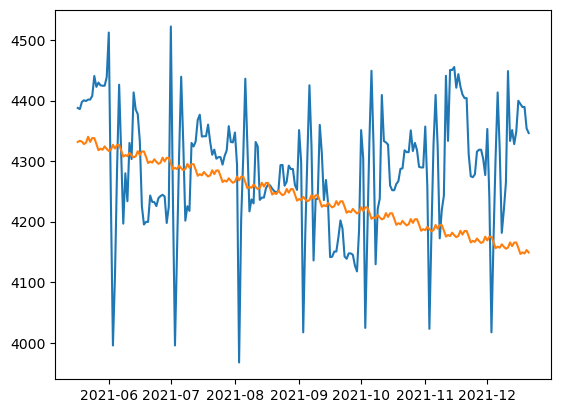

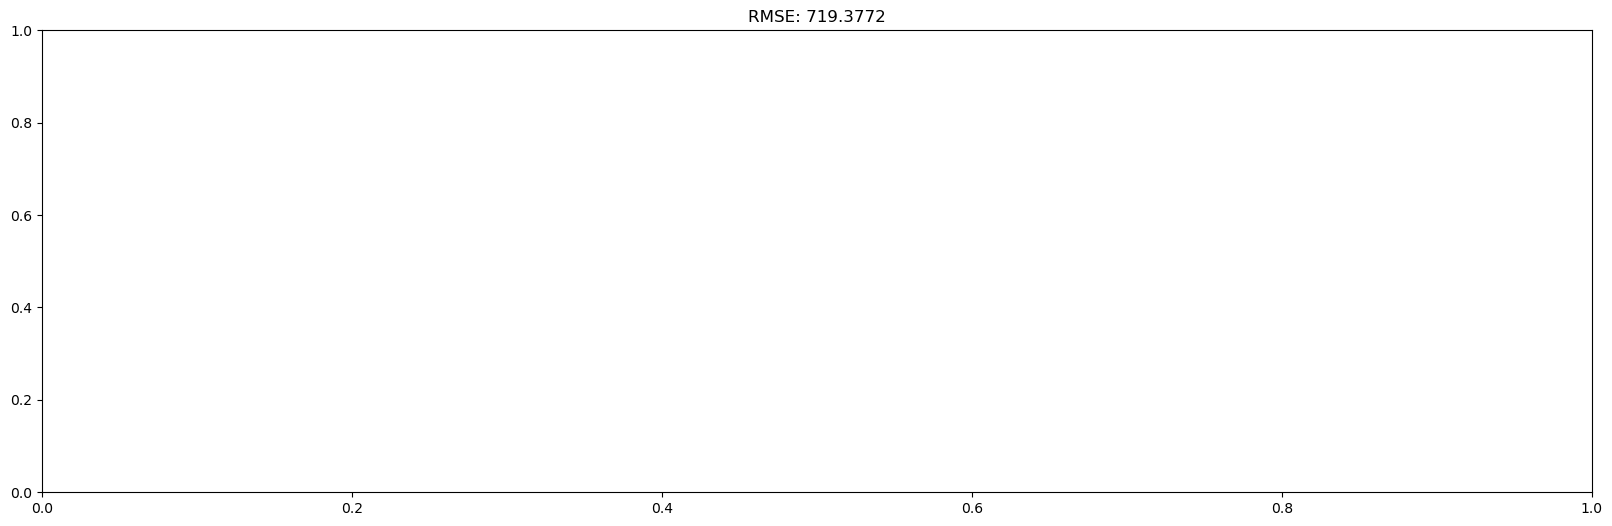

In [478]:
plt.plot(valid)
plt.plot(Sarimax_pred)
plt.figure(figsize=(20,6))
plt.title('RMSE: %.4f'% rmse)
plt.show()

# Tuned SARIMA

In [371]:
import itertools

In [479]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [374]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [480]:
min_aic = 999999999
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        mod = SARIMAX(train,
                    order=param,
                    seasonal_order=param_seasonal,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
            
        results = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            #Check for best model with lowest AIC
        if results.aic < min_aic:
            min_aic = results.aic
            min_aic_model = results

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:37292.17576127192
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:35676.36319175759
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:27185.27962266835
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:26199.81083682918
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:27200.310153260463
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:26312.597457053715
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:26601.097379696857
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:26201.229460935134
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:35824.28534279757
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:32132.920468717704
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:25865.29252931734
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:24845.78474493671
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:25892.46392153705
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:25983.44343706921
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:25302.47062320653
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:24847.639872036198
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:24214.042043347657
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:240

In [482]:
min_aic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              price   No. Observations:                 1963
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood              -11902.780
Date:                            Thu, 18 May 2023   AIC                          23813.560
Time:                                    20:44:10   BIC                          23835.834
Sample:                                01-01-2016   HQIC                         23821.752
                                     - 05-16-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7874      0.015     52.831      0.000       0.758       0.817
ma.L1         -1.0301      0.006   -159.497      0.000      -1.043      -1.017
ma.S.L12      -1.0000      0.013    -77.315      0.000      -1.025      -0.975
sigma2      1.174e+04    1.1e-06   1.06e+10      0.000    1.17e+04    1.17e+04
===================================================================================
Ljung-Box (L1) (Q):                  13.50   Jarque-Bera (JB):             46631.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.40   Skew:                            -1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.91e+24. Standard errors may be unstable.
"""

In [483]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)

In [494]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
Sarimax_pred_Tuned = min_aic_model.predict(start=start_index, end=end_index)

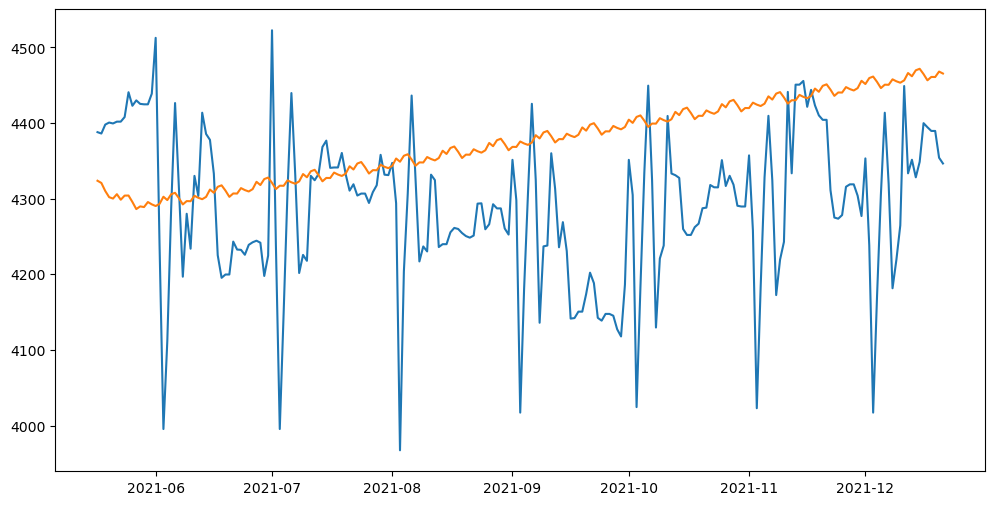

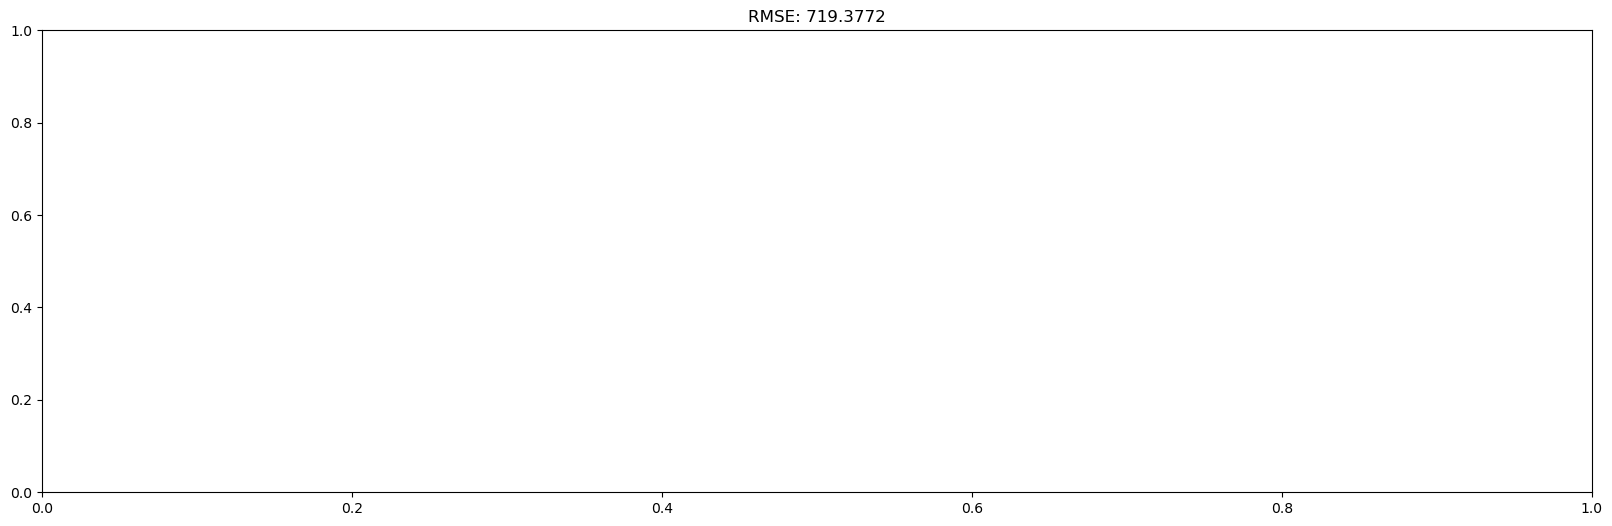

In [495]:
plt.figure(figsize=(12,6))
plt.plot(valid)
plt.plot(Sarimax_pred_Tuned)
plt.figure(figsize=(20,6))
plt.title('RMSE: %.4f'% rmse)
plt.show();

In [489]:
res=res.append(evaluate_forecast(valid.price,Sarimax_pred_Tuned))
res.rename(index={0:'Tuned_Sarima'},inplace=True)
res

r2_score  mean_absolute_error  median_absolute_error  \
Auto Regression -105.207158           945.830254             942.346019   
Arima            -52.394838           659.370802             675.321168   
Arima            -52.394838           659.370802             675.321168   
Sarima            -0.514856            96.922675              77.502517   
Tuned_Sarima      -3.172980           175.213766             168.512165   

                           mse      msle      mape        rmse  
Auto Regression  937370.430723  0.066694  0.220646  968.178925  
Arima            517503.604152  0.034673  0.153463  719.377234  
Arima            517503.604152  0.034673  0.153463  719.377234  
Sarima            14682.011612  0.000808  0.022520  121.169351  
Tuned_Sarima      40444.582799  0.002149  0.041307  201.108386

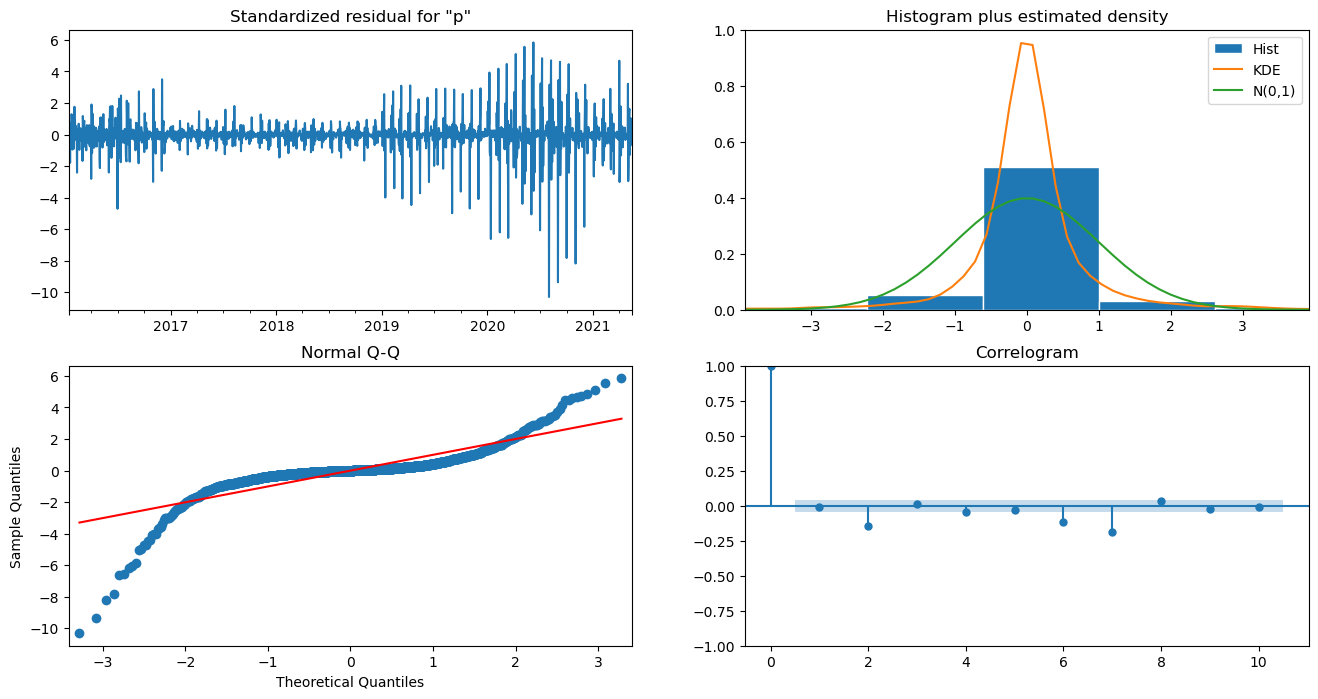

In [498]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

## Model diagnostics:

- Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean.
- If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.
- The model diagnostic suggests that the model residual is normally distributed based on the following:

- In the top right plot, the red KDE line Does not follows closely with the N(0,1) line. Where, N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a bad indication that the residuals are not normally distributed.
- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) doesnot follows the linear trend of the samples taken from a standard normal distribution. Again, this is a strong indication that the residuals are not normally distributed.
- The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise.
- This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

# Auto Arima

In [502]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24038.518, Time=2.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24230.248, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24232.143, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24232.099, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24228.412, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24045.827, Time=1.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24194.384, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24048.642, Time=3.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=24040.518, Time=4.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24069.934, Time=2.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=24044.518, Time=4.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=24195.220, Time=1.11 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=24022.296, Time=3.71 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=24004.225, Time=6.89 sec
 ARIMA(4,1,2)(0,0,0

ARIMA(order=(4, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [504]:
arima=ARIMA(train,order=(4,1,4))
tuned_arima=arima.fit()

In [505]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
tuned_arima_pred = tuned_arima.predict(start=start_index, end=end_index)
tuned_arima_pred

2021-05-17    4359.540978
2021-05-18    4305.796020
2021-05-19    4352.404509
2021-05-20    4319.527343
2021-05-21    4316.589012
                 ...     
2021-12-17    4329.112851
2021-12-18    4329.125414
2021-12-19    4329.113484
2021-12-20    4329.119977
2021-12-21    4329.121155
Freq: D, Name: predicted_mean, Length: 219, dtype: float64

In [506]:
res=res.append(evaluate_forecast(valid.price,tuned_arima_pred))
res.rename(index={0:'Tuned Arima model'},inplace=True)
res

r2_score  mean_absolute_error  median_absolute_error  \
Auto Regression   -105.207158           945.830254             942.346019   
Arima              -52.394838           659.370802             675.321168   
Arima              -52.394838           659.370802             675.321168   
Sarima              -0.514856            96.922675              77.502517   
Tuned_Sarima        -3.172980           175.213766             168.512165   
Tuned Arima model   -0.163745            80.128272              74.435636   

                             mse      msle      mape        rmse  
Auto Regression    937370.430723  0.066694  0.220646  968.178925  
Arima              517503.604152  0.034673  0.153463  719.377234  
Arima              517503.604152  0.034673  0.153463  719.377234  
Sarima              14682.011612  0.000808  0.022520  121.169351  
Tuned_Sarima        40444.582799  0.002149  0.041307  201.108386  
Tuned Arima model   11279.030937  0.000625  0.018933  106.202782

# Exponential Methods
## // Simple Exponential Method /

In [510]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [511]:
ses_model = SimpleExpSmoothing(train).fit(optimized=True)
test_pred_ses = ses_model.forecast(219)
train_pred_ses = ses_model.fittedvalues

In [535]:
residuals=test_pred_ses-valid.price

In [525]:
import statsmodels.api as smf

In [536]:
residuals

2021-05-17   -51.200093
2021-05-18   -49.400093
2021-05-19   -61.200093
2021-05-20   -63.900093
2021-05-21   -62.700093
                ...    
2021-12-17   -57.700093
2021-12-18   -52.800093
2021-12-19   -52.800093
2021-12-20   -17.400093
2021-12-21    -9.800093
Freq: D, Length: 219, dtype: float64

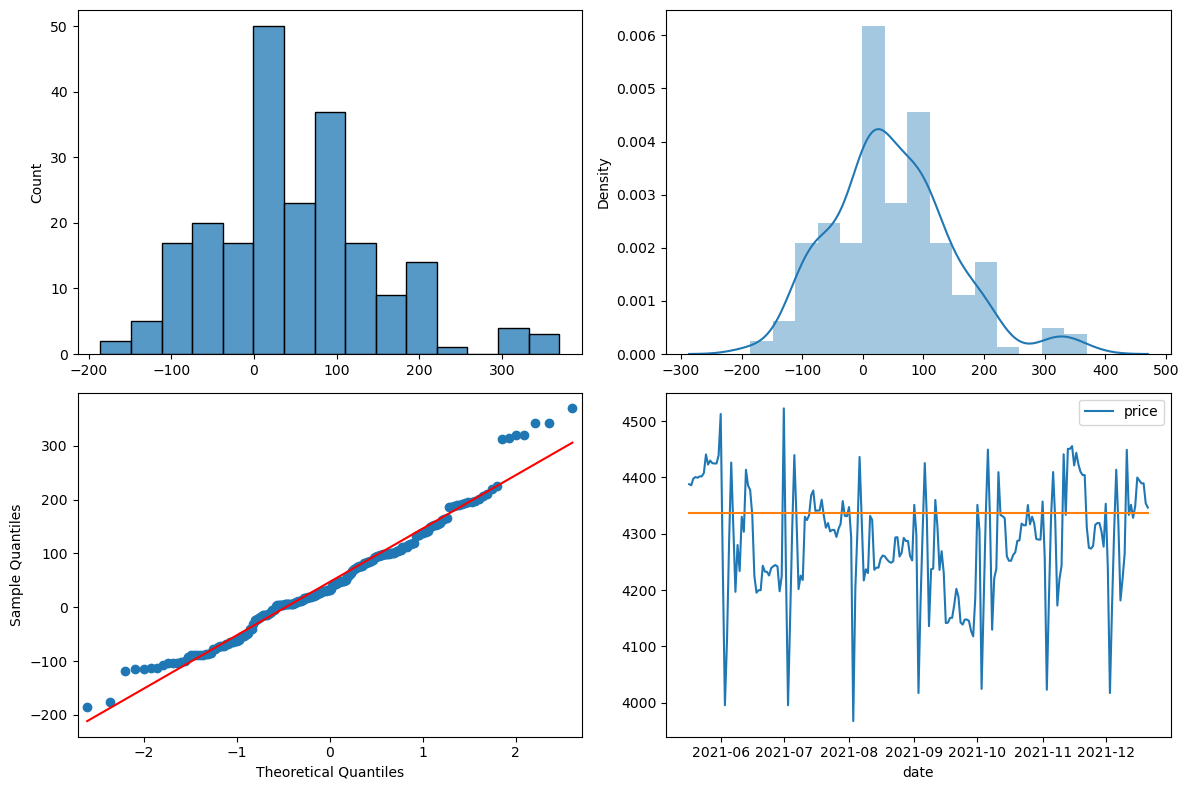

In [541]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(residuals, ax=ax[0, 0])
sns.distplot(residuals, ax=ax[0, 1])
smf.qqplot(residuals, line='r', ax=ax[1, 0])
sns.lineplot(valid,ax=ax[1, 1])
sns.lineplot(test_pred_ses,ax=ax[1, 1])
plt.tight_layout()
plt.show()

In [543]:
desc=pd.DataFrame(residuals)
desc.describe()

0
count  219.000000
mean    47.023651
std     98.673575
min   -185.900093
25%    -13.100093
50%     32.799907
75%    100.299907
max    369.399907

- The Mean Of the error is far from the error so that there is some bias in the model and also the QQ plot of the error is not linear so the model would perform better

In [544]:
res=res.append(evaluate_forecast(test_pred_ses,valid.price))
res.rename(index={0:'Simple Exponential smoothing'},inplace=True)
res

r2_score  mean_absolute_error  \
Auto Regression              -1.052072e+02           945.830254   
Arima                        -5.239484e+01           659.370802   
Arima                        -5.239484e+01           659.370802   
Sarima                       -5.148564e-01            96.922675   
Tuned_Sarima                 -3.172980e+00           175.213766   
Tuned Arima model            -1.637446e-01            80.128272   
Simple Exponential smoothing -3.597533e+27            83.175301   

                              median_absolute_error            mse      msle  \
Auto Regression                          942.346019  937370.430723  0.066694   
Arima                                    675.321168  517503.604152  0.034673   
Arima                                    675.321168  517503.604152  0.034673   
Sarima                                    77.502517   14682.011612  0.000808   
Tuned_Sarima                             168.512165   40444.582799  0.002149   
Tuned Arima model                         74.435636   11279.030937  0.000625   
Simple Exponential smoothing              73.400093   11903.239466  0.000659   

                                  mape        rmse  
Auto Regression               0.220646  968.178925  
Arima                         0.153463  719.377234  
Arima                         0.153463  719.377234  
Sarima                        0.022520  121.169351  
Tuned_Sarima                  0.041307  201.108386  
Tuned Arima model             0.018933  106.202782  
Simple Exponential smoothing  0.019179  109.101968

# Holt method (Double Exponential)

In [545]:
dexp_model  = Holt(train).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(219)
train_pred_dexp = dexp_model.fittedvalues

In [546]:
residuals_dexp=test_pred_dexp-valid.price

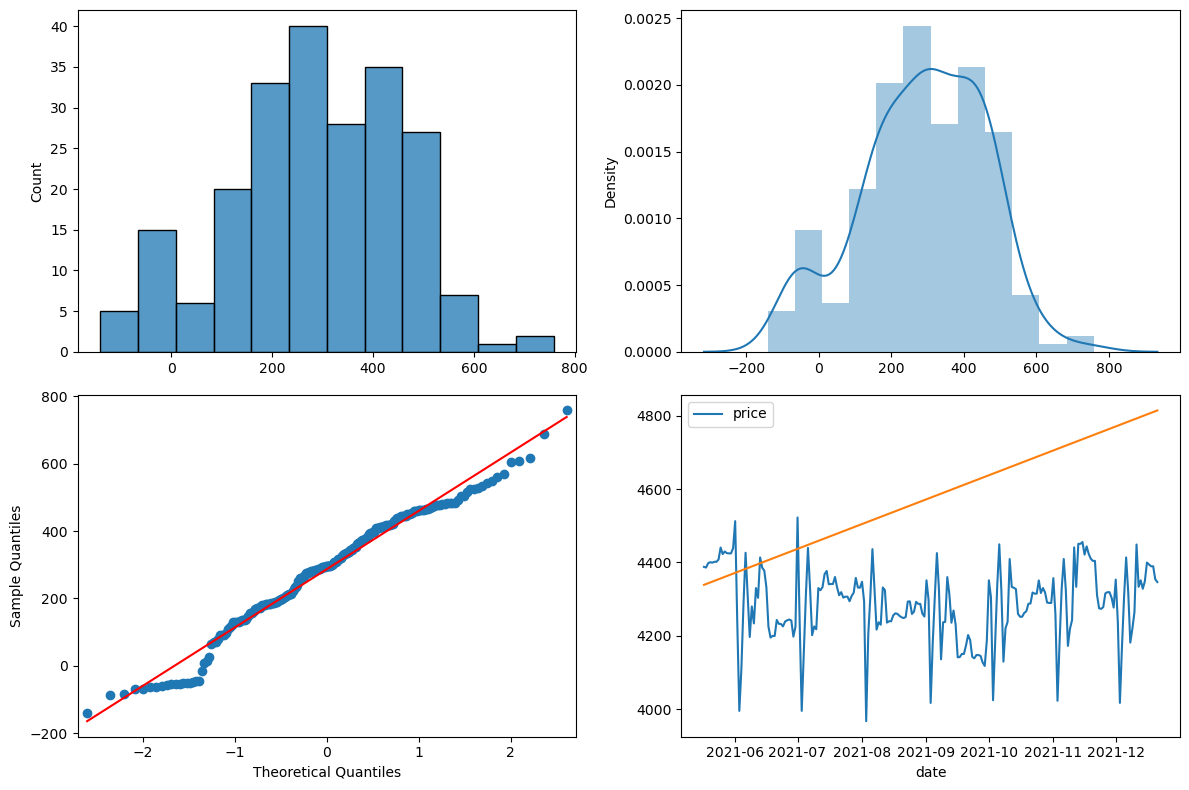

In [547]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(residuals_dexp, ax=ax[0, 0])
sns.distplot(residuals_dexp, ax=ax[0, 1])
smf.qqplot(residuals_dexp, line='r', ax=ax[1, 0])
sns.lineplot(valid,ax=ax[1, 1])
sns.lineplot(test_pred_dexp,ax=ax[1, 1])
plt.tight_layout()
plt.show()

In [548]:
residuals_dexp.describe()

count    219.000000
mean     286.947151
std      171.656401
min     -140.961240
25%      182.012831
50%      295.390340
75%      418.334643
max      757.965990
dtype: float64

- The Mean Of the error is more far from the error so that there is some bias in the model and also the QQ plot of the error is not linear so the model would perform better
- Also it is not following normal distribution

In [549]:
res=res.append(evaluate_forecast(test_pred_dexp,valid.price))
res.rename(index={0:'Holt method (Double Exponential)'},inplace=True)
res

r2_score  mean_absolute_error  \
Auto Regression                  -1.052072e+02           945.830254   
Arima                            -5.239484e+01           659.370802   
Arima                            -5.239484e+01           659.370802   
Sarima                           -5.148564e-01            96.922675   
Tuned_Sarima                     -3.172980e+00           175.213766   
Tuned Arima model                -1.637446e-01            80.128272   
Simple Exponential smoothing     -3.597533e+27            83.175301   
Holt method (Double Exponential) -4.875594e+00           297.573213   

                                  median_absolute_error            mse  \
Auto Regression                              942.346019  937370.430723   
Arima                                        675.321168  517503.604152   
Arima                                        675.321168  517503.604152   
Sarima                                        77.502517   14682.011612   
Tuned_Sarima                                 168.512165   40444.582799   
Tuned Arima model                             74.435636   11279.030937   
Simple Exponential smoothing                  73.400093   11903.239466   
Holt method (Double Exponential)             295.390340  111670.040049   

                                      msle      mape        rmse  
Auto Regression                   0.066694  0.220646  968.178925  
Arima                             0.034673  0.153463  719.377234  
Arima                             0.034673  0.153463  719.377234  
Sarima                            0.000808  0.022520  121.169351  
Tuned_Sarima                      0.002149  0.041307  201.108386  
Tuned Arima model                 0.000625  0.018933  106.202782  
Simple Exponential smoothing      0.000659  0.019179  109.101968  
Holt method (Double Exponential)  0.005646  0.064260  334.170675

# Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)

In [550]:
texp_add_model  = ExponentialSmoothing(train,seasonal="add",trend="add",seasonal_periods=30).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(219)
train_pred_ad_texp = texp_add_model.fittedvalues

In [551]:
residuals_ad_texp=test_pred_ad_texp-valid.price

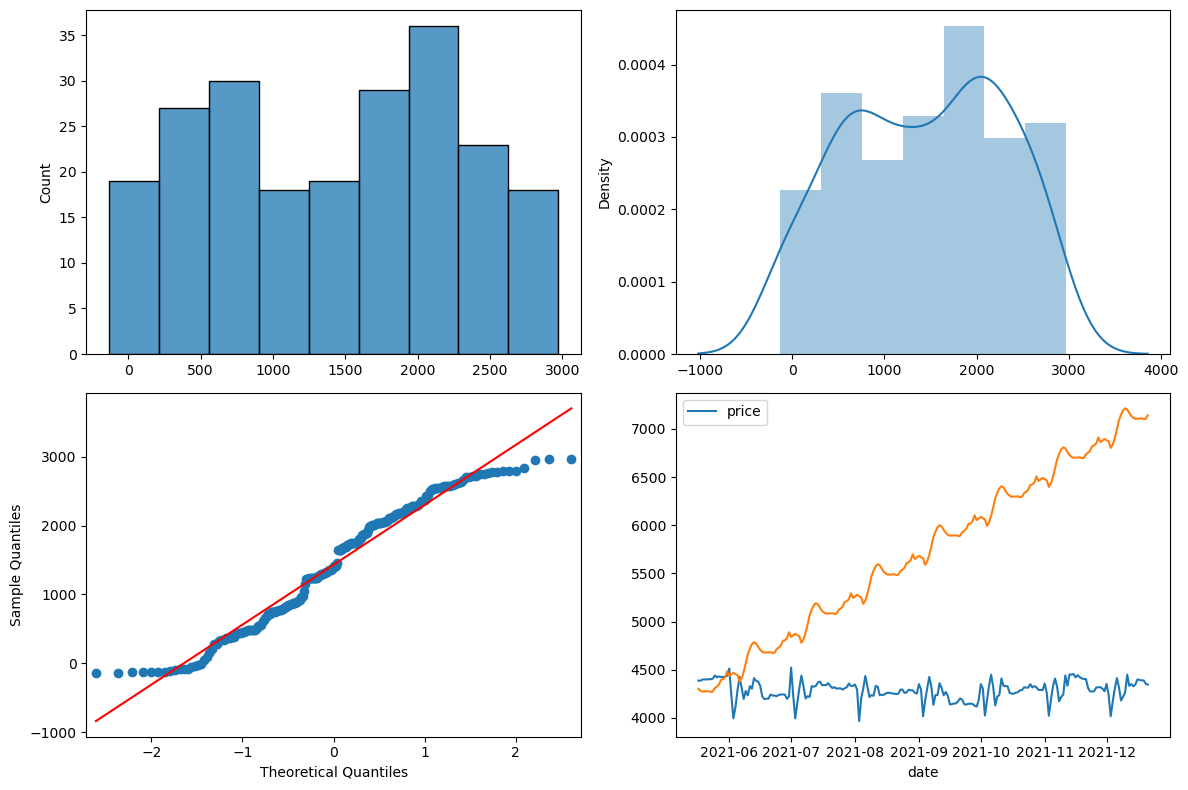

In [552]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(residuals_ad_texp, ax=ax[0, 0])
sns.distplot(residuals_ad_texp, ax=ax[0, 1])
smf.qqplot(residuals_ad_texp, line='r', ax=ax[1, 0])
sns.lineplot(valid,ax=ax[1, 1])
sns.lineplot(test_pred_ad_texp,ax=ax[1, 1])
plt.tight_layout()
plt.show()

In [553]:
residuals_ad_texp.describe()

count     219.000000
mean     1431.766700
std       867.614850
min      -134.266918
25%       747.376526
50%      1408.640931
75%      2147.742217
max      2972.176869
dtype: float64

In [554]:
res=res.append(evaluate_forecast(test_pred_ad_texp,valid.price))
res.rename(index={0:'Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.640931   

                                                             mse      msle  \
Auto Regression                                     9.373704e+05  0.066694   
Arima                                               5.175036e+05  0.034673   
Arima                                               5.175036e+05  0.034673   
Sarima                                              1.468201e+04  0.000808   
Tuned_Sarima                                        4.044458e+04  0.002149   
Tuned Arima model                                   1.127903e+04  0.000625   
Simple Exponential smoothing                        1.190324e+04  0.000659   
Holt method (Double Exponential)                    1.116700e+05  0.005646   
Holts winter exponential smoothing with additiv...  2.799274e+06  0.100654   

                                                        mape         rmse  
Auto Regression                                     0.220646   968.178925  
Arima                                               0.153463   719.377234  
Arima                                               0.153463   719.377234  
Sarima                                              0.022520   121.169351  
Tuned_Sarima                                        0.041307   201.108386  
Tuned Arima model                                   0.018933   106.202782  
Simple Exponential smoothing                        0.019179   109.101968  
Holt method (Double Exponential)                    0.064260   334.170675  
Holts winter exponential smoothing with additiv...  0.235512  1673.103156

- Observation

- 1.It captures the trend, which we can see that the forecasted values are lower level than the test level.

- 2.It also captures the seasonality.

- 3.The mean is far away from the 0 so that our model consisting large bias and qqplot is also not linear so we can not used this model for deployment.

# Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

In [610]:
texp_mul_ad_model  = ExponentialSmoothing(train,seasonal="mul",trend="add",seasonal_periods=30).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(steps=len(valid))
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues

In [611]:
test_pred_mul_ad_texp

2021-05-17    4270.928354
2021-05-18    4212.046486
2021-05-19    4162.400131
2021-05-20    4132.174430
2021-05-21    4105.116236
                 ...     
2021-12-17    4065.323604
2021-12-18    4043.820339
2021-12-19    4000.670976
2021-12-20    3964.539930
2021-12-21    3973.052494
Freq: D, Length: 219, dtype: float64

In [612]:
residuals_mul_ad_texp = test_pred_mul_ad_texp - valid.price
residuals_mul_ad_texp

2021-05-17   -116.971646
2021-05-18   -174.053514
2021-05-19   -235.499869
2021-05-20   -268.425570
2021-05-21   -294.283764
                 ...    
2021-12-17   -329.076396
2021-12-18   -345.679661
2021-12-19   -388.829024
2021-12-20   -389.560070
2021-12-21   -373.447506
Freq: D, Length: 219, dtype: float64

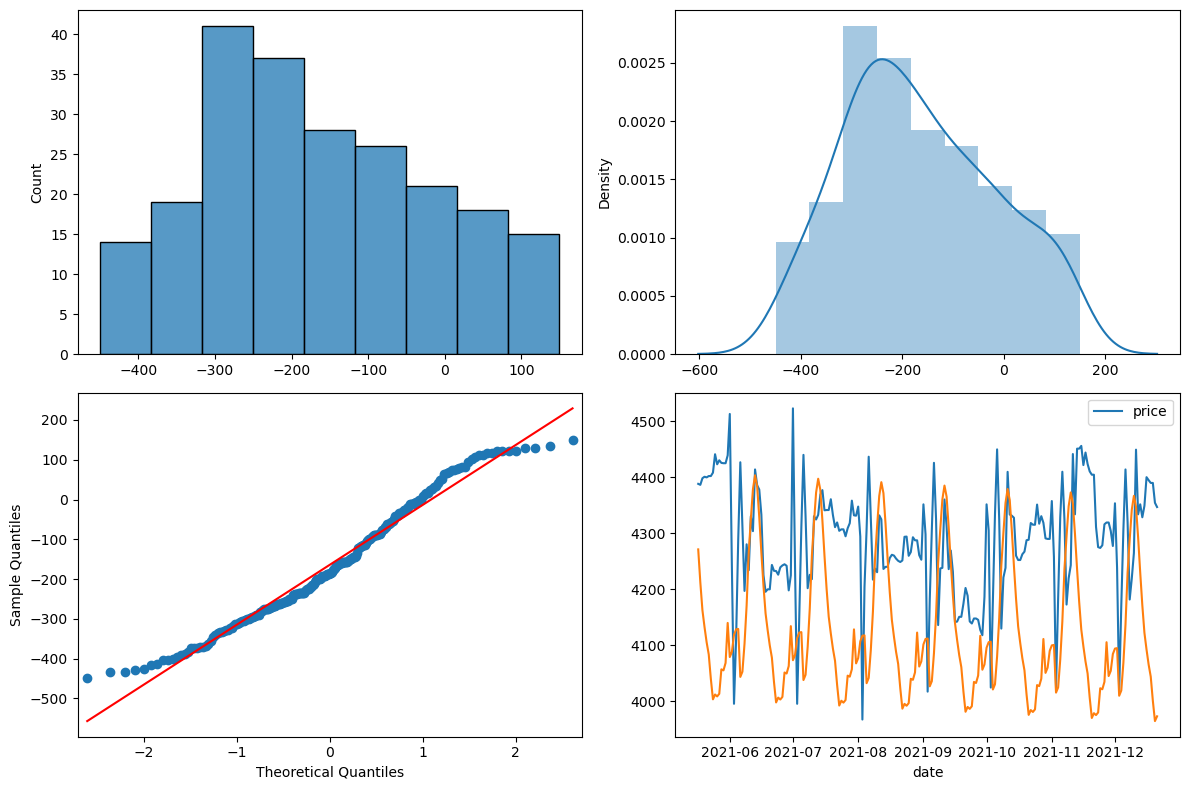

In [613]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(residuals_mul_ad_texp, ax=ax[0, 0])
sns.distplot(residuals_mul_ad_texp, ax=ax[0, 1])
smf.qqplot(residuals_mul_ad_texp, line='r', ax=ax[1, 0])
sns.lineplot(valid,ax=ax[1, 1])
sns.lineplot(test_pred_mul_ad_texp,ax=ax[1, 1])
plt.tight_layout()
plt.show()

In [614]:
residuals_mul_ad_texp.describe()

count    219.000000
mean    -163.848134
std      149.525953
min     -449.432152
25%     -273.948625
50%     -185.607073
75%      -55.789508
max      149.517723
dtype: float64

- We could see here mean value in negatives which is also more away from the 0 
- also the residuals are following the slighly following the normal distribution

In [621]:
res=res.append(evaluate_forecast(test_pred_mul_ad_texp , valid.price))
res.rename(index={0:'Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   
Holts winter exponential smoothing with multipl... -2.534393e+00   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   
Holts winter exponential smoothing with multipl...           189.227922   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.640931   
Holts winter exponential smoothing with multipl...             185.607073   

                                                             mse      msle  \
Auto Regression                                     9.373704e+05  0.066694   
Arima                                               5.175036e+05  0.034673   
Arima                                               5.175036e+05  0.034673   
Sarima                                              1.468201e+04  0.000808   
Tuned_Sarima                                        4.044458e+04  0.002149   
Tuned Arima model                                   1.127903e+04  0.000625   
Simple Exponential smoothing                        1.190324e+04  0.000659   
Holt method (Double Exponential)                    1.116700e+05  0.005646   
Holts winter exponential smoothing with additiv...  2.799274e+06  0.100654   
Holts winter exponential smoothing with multipl...  4.910213e+04  0.002783   

                                                        mape         rmse  
Auto Regression                                     0.220646   968.178925  
Arima                                               0.153463   719.377234  
Arima                                               0.153463   719.377234  
Sarima                                              0.022520   121.169351  
Tuned_Sarima                                        0.041307   201.108386  
Tuned Arima model                                   0.018933   106.202782  
Simple Exponential smoothing                        0.019179   109.101968  
Holt method (Double Exponential)                    0.064260   334.170675  
Holts winter exponential smoothing with additiv...  0.235512  1673.103156  
Holts winter e

# Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)

## Observation

- 1.It captures the trend, which we can see that the forecasted values are higher level than the test level.

- 2.It also captures the seasonality.

- 3.The peak of the forecasted value is higher than the actual.

In [616]:
texp_ad_mul_model  = ExponentialSmoothing(train,seasonal="add",trend="mul",seasonal_periods=30).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(219)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues

In [617]:
residuals_ad_mul_texp = test_pred_ad_mul_texp - valid.price
residuals_ad_mul_texp

2021-05-17    -196.715945
2021-05-18    -211.727801
2021-05-19    -278.547159
2021-05-20    -290.999696
2021-05-21    -326.883659
                 ...     
2021-12-17   -3179.321541
2021-12-18   -3194.618338
2021-12-19   -3196.911440
2021-12-20   -3188.029977
2021-12-21   -3196.701157
Freq: D, Length: 219, dtype: float64

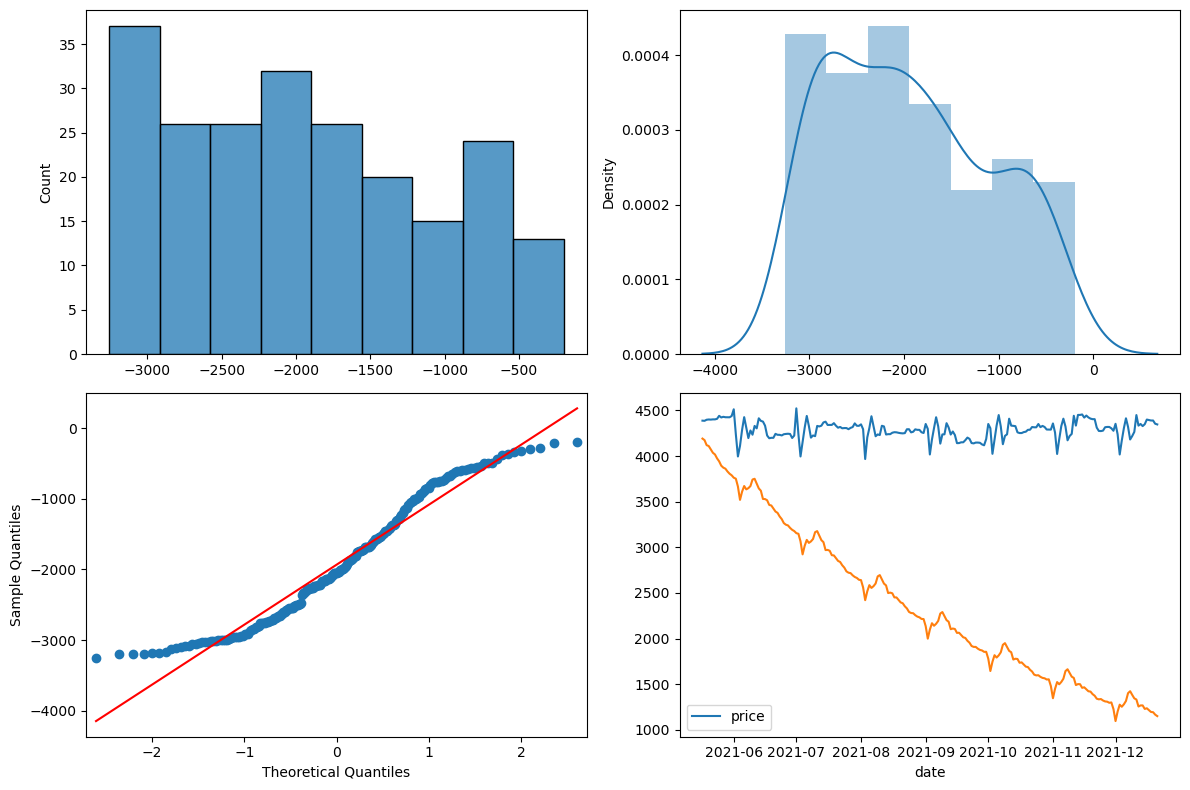

In [619]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(residuals_ad_mul_texp, ax=ax[0, 0])
sns.distplot(residuals_ad_mul_texp, ax=ax[0, 1])
smf.qqplot(residuals_ad_mul_texp, line='r', ax=ax[1, 0])
sns.lineplot(valid,ax=ax[1, 1])
sns.lineplot(test_pred_ad_mul_texp,ax=ax[1, 1])
plt.legend()
plt.tight_layout()
plt.show()

In [620]:
residuals_ad_mul_texp.describe()

count     219.000000
mean    -1932.966816
std       852.236181
min     -3258.061311
25%     -2683.018732
50%     -2045.766405
75%     -1288.539430
max      -196.715945
dtype: float64

- The mean value is so far away from the mean ,its not a not good ft model

In [622]:
res=res.append(evaluate_forecast(test_pred_ad_mul_texp , valid.price))
res.rename(index={0:'Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   
Holts winter exponential smoothing with multipl... -2.534393e+00   
Holts winter exponential smoothing with Additiv... -5.118240e+00   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   
Holts winter exponential smoothing with multipl...           189.227922   
Holts winter exponential smoothing with Additiv...          1932.966816   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.640931   
Holts winter exponential smoothing with multipl...             185.607073   
Holts winter exponential smoothing with Additiv...            2045.766405   

                                                             mse      msle  \
Auto Regression                                     9.373704e+05  0.066694   
Arima                                               5.175036e+05  0.034673   
Arima                                               5.175036e+05  0.034673   
Sarima                                              1.468201e+04  0.000808   
Tuned_Sarima                                        4.044458e+04  0.002149   
Tuned Arima model                                   1.127903e+04  0.000625   
Simple Exponential smoothing                        1.190324e+04  0.000659   
Holt method (Double Exponential)                    1.116700e+05  0.005646   
Holts winter exponential smoothing with additiv...  2.799274e+06  0.100654   
Holts winter exponential smoothing with multipl...  4.910213e+04  0.002783   
Holts winter exponential smoothing with Additiv...  4.459351e+06  0.577142   

                                                        mape         rmse  
Auto Regression                                     0.220646   968.178925  
Arima                                               0.153463   719.377234  
Arima                                               0.153463   719.377234  
Sarima                                              0.022520   121.169351  
Tuned_Sarima                                        0.041307   201.108386  
Tuned Arima model   

# Regression models

# Model based methods

### Data Pre-processing for Model Driven Techniques

In [623]:
df2 = df1.copy()
df2.reset_index(inplace=True)
df2['t'] = np.arange(1,len(df2)+1)
df2['t_squared'] = np.square(df2.t)
df2["month"] = df2.date.dt.strftime("%b") # month extraction
df2["year"] = df2.date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(df2['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
df2 = pd.concat([df2,months],axis=1)
df2['log_price'] = np.log(df2['price'])
df2

date    price     t  t_squared month  year  Jan  Feb  Mar  Apr  \
0    2016-01-01  2252.60     1          1   Jan  2016    1    0    0    0   
1    2016-01-02  2454.50     2          4   Jan  2016    1    0    0    0   
2    2016-01-03  2708.10     3          9   Jan  2016    1    0    0    0   
3    2016-01-04  2577.80     4         16   Jan  2016    1    0    0    0   
4    2016-01-05  2597.75     5         25   Jan  2016    1    0    0    0   
...         ...      ...   ...        ...   ...   ...  ...  ...  ...  ...   
2177 2021-12-17  4394.40  2178    4743684   Dec  2021    0    0    0    0   
2178 2021-12-18  4389.50  2179    4748041   Dec  2021    0    0    0    0   
2179 2021-12-19  4389.50  2180    4752400   Dec  2021    0    0    0    0   
2180 2021-12-20  4354.10  2181    4756761   Dec  2021    0    0    0    0   
2181 2021-12-21  4346.50  2182    4761124   Dec  2021    0    0    0    0   

      May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_price  
0       0    0    0    0    0    0    0    0   7.719840  
1       0    0    0    0    0    0    0    0   7.805678  
2       0    0    0    0    0    0    0    0   7.904003  
3       0    0    0    0    0    0    0    0   7.854692  
4       0    0    0    0    0    0    0    0   7.862401  
...   ...  ...  ...  ...  ...  ...  ...  ...        ...  
2177    0    0    0    0    0    0    0    1   8.388086  
2178    0    0    0    0    0    0    0    1   8.386971  
2179    0    0    0    0    0    0    0    1   8.386971  
2180    0    0    0    0    0    0    0    1   8.378873  
2181    0    0    0    0    0    0    0    1   8.377126  

[2182 rows x 19 columns]

In [629]:
int(len(df1)*0.9)

1963

In [625]:
train_data = df2.iloc[:1963]
test_data = df2.iloc[1963:]

In [626]:
train_data.shape

(1461, 19)

# Linear model

In [630]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('price~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['price'])-np.array(pred_linear))**2))
rmse_linear

1006.499031889818

In [631]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     1479.
Date:                Fri, 19 May 2023   Prob (F-statistic):          4.68e-224
Time:                        00:34:14   Log-Likelihood:                -9622.2
No. Observations:                1461   AIC:                         1.925e+04
Df Residuals:                    1459   BIC:                         1.926e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2506.1542      9.189    272.739      0.000    2488.129    2524.179
t              0.4188      0.011     38.462      0.000       0.397       0.440
==============================================================================
Omnibus:                      149.004   Durbin-Watson:                   0.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.301
Skew:                           0.895   Prob(JB):                     2.37e-43
Kurtosis:                       2.860   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [633]:
res=res.append(evaluate_forecast(pred_linear,test_data.price))
res.rename(index={0:'Linear model'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   
Holts winter exponential smoothing with multipl... -2.534393e+00   
Holts winter exponential smoothing with Additiv... -5.118240e+00   
Linear model                                       -1.323470e+02   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   
Holts winter exponential smoothing with multipl...           189.227922   
Holts winter exponential smoothing with Additiv...          1932.966816   
Linear model                                                 972.083253   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.640931   
Holts winter exponential smoothing with multipl...             185.607073   
Holts winter exponential smoothing with Additiv...            2045.766405   
Linear model                                                   973.560500   

                                                             mse      msle  \
Auto Regression                                     9.373704e+05  0.066694   
Arima                                               5.175036e+05  0.034673   
Arima                                               5.175036e+05  0.034673   
Sarima                                              1.468201e+04  0.000808   
Tuned_Sarima                                        4.044458e+04  0.002149   
Tuned Arima model                                   1.127903e+04  0.000625   
Simple Exponential smoothing                        1.190324e+04  0.000659   
Holt method (Double Exponential)                    1.116700e+05  0.005646   
Holts winter exponential smoothing with additiv...  2.799274e+06  0.100654   
Holts winter exponential smoothing with multipl...  4.910213e+04  0.002783   
Holts winter exponential smoothing with Additiv...  4.459351e+06  0.577142   
Linear model                                        1.013040e+06  0.070835   

                                                        mape         rmse  
Auto Regression                                     0.220646   968.178925  
Arima                     

# Exponential model

In [634]:
#Exponential
import statsmodels.formula.api as smf 
Exp = smf.ols('log_price~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

998.0974903232183

In [637]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     1530.
Date:                Fri, 19 May 2023   Prob (F-statistic):          1.87e-229
Time:                        00:49:00   Log-Likelihood:                 2059.5
No. Observations:                1461   AIC:                            -4115.
Df Residuals:                    1459   BIC:                            -4104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8332      0.003   2530.226      0.000       7.827       7.839
t              0.0001   3.67e-06     39.112      0.000       0.000       0.000
==============================================================================
Omnibus:                      127.142   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.027
Skew:                           0.766   Prob(JB):                     1.60e-33
Kurtosis:                       2.632   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [636]:
res=res.append(evaluate_forecast(np.exp(pred_Exp),test_data.price))
res.rename(index={0:'Exponential model'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   
Holts winter exponential smoothing with multipl... -2.534393e+00   
Holts winter exponential smoothing with Additiv... -5.118240e+00   
Linear model                                       -1.323470e+02   
Exponential model                                  -1.029708e+02   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   
Holts winter exponential smoothing with multipl...           189.227922   
Holts winter exponential smoothing with Additiv...          1932.966816   
Linear model                                                 972.083253   
Exponential model                                            963.058406   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.640931   
Holts winter exponential smoothing with multipl...             185.607073   
Holts winter exponential smoothing with Additiv...            2045.766405   
Linear model                                                   973.560500   
Exponential model                                              959.045359   

                                                             mse      msle  \
Auto Regression                                     9.373704e+05  0.066694   
Arima                                               5.175036e+05  0.034673   
Arima                                               5.175036e+05  0.034673   
Sarima                                              1.468201e+04  0.000808   
Tuned_Sarima                                        4.044458e+04  0.002149   
Tuned Arima model                                   1.127903e+04  0.000625   
Simple Exponential smoothing                        1.190324e+04  0.000659   
Holt method (Double Exponential)                    1.116700e+05  0.005646   
Holts winter exponential smoothing with additiv...  2.799274e+06  0.100654   
Holts winter exponential smoothing with multipl...  4.910213e+04  0.002783   
Holts winter exponential smoothing with Additiv...  4.459351e+06  0.577142   
Linear model                         

# Quadratic model

In [639]:
#Quadratic 

Quad = smf.ols('price~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['price'])-np.array(pred_Quad))**2))
rmse_Quad

489.90755781777136

In [640]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1667.
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        00:51:58   Log-Likelihood:                -9264.5
No. Observations:                1461   AIC:                         1.853e+04
Df Residuals:                    1458   BIC:                         1.855e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2750.6996     10.803    254.623      0.000    2729.509    2771.891
t             -0.5841      0.034    -17.116      0.000      -0.651      -0.517
t_squared      0.0007   2.26e-05     30.350      0.000       0.001       0.001
==============================================================================
Omnibus:                       65.477   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.810
Skew:                           0.169   Prob(JB):                     5.47e-40
Kurtosis:                       4.690   Cond. No.                     2.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [641]:
pred_Quad

1461    3362.944199
1462    3364.366577
1463    3365.790327
1464    3367.215449
1465    3368.641943
           ...     
2177    4732.553743
2178    4734.958462
2179    4737.364553
2180    4739.772016
2181    4742.180850
Length: 721, dtype: float64

In [642]:
res=res.append(evaluate_forecast(pred_Quad,test_data.price))
res.rename(index={0:'Quadratic Model'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   
Holts winter exponential smoothing with multipl... -2.534393e+00   
Holts winter exponential smoothing with Additiv... -5.118240e+00   
Linear model                                       -1.323470e+02   
Exponential model                                  -1.029708e+02   
Quadratic Model                                    -5.031468e-01   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   
Holts winter exponential smoothing with multipl...           189.227922   
Holts winter exponential smoothing with Additiv...          1932.966816   
Linear model                                                 972.083253   
Exponential model                                            963.058406   
Quadratic Model                                              393.146409   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.640931   
Holts winter exponential smoothing with multipl...             185.607073   
Holts winter exponential smoothing with Additiv...            2045.766405   
Linear model                                                   973.560500   
Exponential model                                              959.045359   
Quadratic Model                                                329.339487   

                                                             mse      msle  \
Auto Regression                                     9.373704e+05  0.066694   
Arima                                               5.175036e+05  0.034673   
Arima                                               5.175036e+05  0.034673   
Sarima                                              1.468201e+04  0.000808   
Tuned_Sarima                                        4.044458e+04  0.002149   
Tuned Arima model                                   1.127903e+04  0.000625   
Simple Exponential smoothing                        1.190324e+04  0.000659   
Holt method (Double Exponential)                    1.116700e+05  0.005646   
Holts winter exponential smoothing with additiv... 

# Additive seasonality

In [643]:
#Additive seasonality 

add_sea = smf.ols('price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['price'])-np.array(pred_add_sea))**2))
rmse_add_sea

1452.2836765455654

In [644]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     5.824
Date:                Fri, 19 May 2023   Prob (F-statistic):           2.69e-09
Time:                        00:55:37   Log-Likelihood:                -10102.
No. Observations:                1461   AIC:                         2.023e+04
Df Residuals:                    1449   BIC:                         2.029e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2595.9622      5.909    439.314      0.000    2584.371    2607.554
Jan          125.6137     21.052      5.967      0.000      84.319     166.909
Feb          195.8320     21.975      8.911      0.000     152.725     238.939
Mar          163.3164     21.052      7.758      0.000     122.021     204.611
Apr          173.1232     21.372      8.100      0.000     131.199     215.047
May          171.0668     21.052      8.126      0.000     129.772     212.362
Jun          212.4707     21.372      9.941      0.000     170.546     254.395
Jul          217.8192     21.052     10.347      0.000     176.524     259.114
Aug          281.2019     21.052     13.358      0.000     239.907     322.497
Sep          291.7094     21.372     13.649      0.000     249.785     333.634
Oct          284.3982     21.052     13.510      0.000     243.103     325.693
Nov          250.1940     21.372     11.706      0.000     208.270     292.118
Dec          229.2167     21.052     10.888      0.000     187.922     270.512
==============================================================================
Omnibus:                      242.170   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.502
Skew:                           1.157   Prob(JB):                     7.85e-82
Kurtosis:                       3.885   Cond. No.                     5.14e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.99e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [646]:
res=res.append(evaluate_forecast(pred_add_sea,test_data.price))
res.rename(index={0:'Additive Seasonality'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   
Holts winter exponential smoothing with multipl... -2.534393e+00   
Holts winter exponential smoothing with Additiv... -5.118240e+00   
Linear model                                       -1.323470e+02   
Exponential model                                  -1.029708e+02   
Quadratic Model                                    -5.031468e-01   
Additive Seasonality                               -7.930884e+02   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   
Holts winter exponential smoothing with multipl...           189.227922   
Holts winter exponential smoothing with Additiv...          1932.966816   
Linear model                                                 972.083253   
Exponential model                                            963.058406   
Quadratic Model                                              393.146409   
Additive Seasonality                                        1429.156577   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.640931   
Holts winter exponential smoothing with multipl...             185.607073   
Holts winter exponential smoothing with Additiv...            2045.766405   
Linear model                                                   973.560500   
Exponential model                                              959.045359   
Quadratic Model                                                329.339487   
Additive Seasonality                                          1464.770968   

                                                             mse      msle  \
Auto Regression                                     9.373704e+05  0.066694   
Arima                                               5.175036e+05  0.034673   
Arima                                               5.175036e+05  0.034673   
Sarima                                              1.468201e+04  0.000808   
Tuned_Sarima                                        4.044458e+04  0.002149   
Tuned Arima model                                   1.127903e+04 

# Additive Seasonality Quadratic

In [647]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('price~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

486.87098366462664

In [648]:
add_sea_Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     278.3
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        00:57:57   Log-Likelihood:                -9218.4
No. Observations:                1461   AIC:                         1.846e+04
Df Residuals:                    1447   BIC:                         1.854e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2540.6990      9.815    258.851      0.000    2521.445    2559.953
t             -0.5935      0.033    -17.809      0.000      -0.659      -0.528
t_squared      0.0007    2.2e-05     31.489      0.000       0.001       0.001
Jan          179.1913     11.547     15.518      0.000     156.540     201.842
Feb          243.5969     12.039     20.233      0.000     219.981     267.213
Mar          203.4378     11.530     17.644      0.000     180.820     226.055
Apr          204.3247     11.705     17.456      0.000     181.364     227.286
May          192.0509     11.535     16.650      0.000     169.424     214.678
Jun          221.9539     11.718     18.942      0.000     198.969     244.939
Jul          214.5040     11.554     18.566      0.000     191.840     237.168
Aug          263.5595     11.568     22.784      0.000     240.868     286.251
Sep          258.6735     11.759     21.997      0.000     235.606     281.741
Oct          234.6712     11.607     20.218      0.000     211.903     257.439
Nov          182.4924     11.807     15.456      0.000     159.331     205.654
Dec          142.2429     11.668     12.191      0.000     119.354     165.131
==============================================================================
Omnibus:                       68.632   Durbin-Watson:                   0.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.476
Skew:                           0.147   Prob(JB):                     3.97e-45
Kurtosis:                       4.809   Cond. No.                     9.62e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [649]:
res=res.append(evaluate_forecast(pred_add_sea_quad,test_data.price))
res.rename(index={0:'Additive Seasonality Quadratic'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   
Holts winter exponential smoothing with multipl... -2.534393e+00   
Holts winter exponential smoothing with Additiv... -5.118240e+00   
Linear model                                       -1.323470e+02   
Exponential model                                  -1.029708e+02   
Quadratic Model                                    -5.031468e-01   
Additive Seasonality                               -7.930884e+02   
Additive Seasonality Quadratic                     -4.468716e-01   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   
Holts winter exponential smoothing with multipl...           189.227922   
Holts winter exponential smoothing with Additiv...          1932.966816   
Linear model                                                 972.083253   
Exponential model                                            963.058406   
Quadratic Model                                              393.146409   
Additive Seasonality                                        1429.156577   
Additive Seasonality Quadratic                               395.909309   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.640931   
Holts winter exponential smoothing with multipl...             185.607073   
Holts winter exponential smoothing with Additiv...            2045.766405   
Linear model                                                   973.560500   
Exponential model                                              959.045359   
Quadratic Model                                                329.339487   
Additive Seasonality                                          1464.770968   
Additive Seasonality Quadratic                                 334.946379   

                                                             mse      msle  \
Auto Regression                                     9.373704e+05  0.066694   
Arima                                               5.175036e+05  0.034673   
Arima                                               5.175036e+05  0.034673   
S

# Multiplicative Seasonality

In [650]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['price'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1462.0497386520747

In [654]:
np.exp(pred_Mult_sea)

1461    2712.233483
1462    2712.233483
1463    2712.233483
1464    2712.233483
1465    2712.233483
           ...     
2177    2808.270491
2178    2808.270491
2179    2808.270491
2180    2808.270491
2181    2808.270491
Length: 721, dtype: float64

In [651]:
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     5.809
Date:                Fri, 19 May 2023   Prob (F-statistic):           2.88e-09
Time:                        01:00:12   Log-Likelihood:                 1567.2
No. Observations:                1461   AIC:                            -3110.
Df Residuals:                    1449   BIC:                            -3047.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3275      0.002   3649.145      0.000       7.324       7.331
Jan            0.5781      0.007     80.807      0.000       0.564       0.592
Feb            0.6047      0.007     80.980      0.000       0.590       0.619
Mar            0.5932      0.007     82.923      0.000       0.579       0.607
Apr            0.5967      0.007     82.166      0.000       0.582       0.611
May            0.5960      0.007     83.311      0.000       0.582       0.610
Jun            0.6102      0.007     84.019      0.000       0.596       0.624
Jul            0.6117      0.007     85.516      0.000       0.598       0.626
Aug            0.6317      0.007     88.303      0.000       0.618       0.646
Sep            0.6365      0.007     87.645      0.000       0.622       0.651
Oct            0.6339      0.007     88.616      0.000       0.620       0.648
Nov            0.6218      0.007     85.619      0.000       0.608       0.636
Dec            0.6129      0.007     85.672      0.000       0.599       0.627
==============================================================================
Omnibus:                      179.614   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.359
Skew:                           0.968   Prob(JB):                     1.93e-54
Kurtosis:                       3.564   Cond. No.                     5.14e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.99e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [655]:
res=res.append(evaluate_forecast(np.exp(pred_Mult_sea),test_data.price))
res.rename(index={0:'Multiplicative Seasonality'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   
Holts winter exponential smoothing with multipl... -2.534393e+00   
Holts winter exponential smoothing with Additiv... -5.118240e+00   
Linear model                                       -1.323470e+02   
Exponential model                                  -1.029708e+02   
Quadratic Model                                    -5.031468e-01   
Additive Seasonality                               -7.930884e+02   
Additive Seasonality Quadratic                     -4.468716e-01   
Multiplicative Seasonality                         -5.878418e+10   
Multiplicative Seasonality                         -8.895152e+02   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   
Holts winter exponential smoothing with multipl...           189.227922   
Holts winter exponential smoothing with Additiv...          1932.966816   
Linear model                                                 972.083253   
Exponential model                                            963.058406   
Quadratic Model                                              393.146409   
Additive Seasonality                                        1429.156577   
Additive Seasonality Quadratic                               395.909309   
Multiplicative Seasonality                                  4233.301914   
Multiplicative Seasonality                                  1438.973681   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.640931   
Holts winter exponential smoothing with multipl...             185.607073   
Holts winter exponential smoothing with Additiv...            2045.766405   
Linear model                                                   973.560500   
Exponential model                                              959.045359   
Quadratic Model                                                329.339487   
Additive Seasonality                                          1464.770968   
Additive Seasonality Quadratic                                 334.946379   
Multiplicative Seasonality  

# Multiplicative Additive Seasonality

In [656]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_price~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

994.1000113741412

In [658]:
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     135.1
Date:                Fri, 19 May 2023   Prob (F-statistic):          4.03e-226
Time:                        01:03:59   Log-Likelihood:                 2084.5
No. Observations:                1461   AIC:                            -4143.
Df Residuals:                    1448   BIC:                            -4074.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2301      0.003   2503.698      0.000       7.224       7.236
t              0.0001   3.74e-06     38.624      0.000       0.000       0.000
Jan            0.5939      0.005    117.866      0.000       0.584       0.604
Feb            0.6170      0.005    117.474      0.000       0.607       0.627
Mar            0.6005      0.005    119.485      0.000       0.591       0.610
Apr            0.5996      0.005    117.593      0.000       0.590       0.610
May            0.5945      0.005    118.364      0.000       0.585       0.604
Jun            0.6043      0.005    118.463      0.000       0.594       0.614
Jul            0.6014      0.005    119.585      0.000       0.592       0.611
Aug            0.6169      0.005    122.478      0.000       0.607       0.627
Sep            0.6173      0.005    120.505      0.000       0.607       0.627
Oct            0.6103      0.005    120.635      0.000       0.600       0.620
Nov            0.5938      0.005    115.303      0.000       0.584       0.604
Dec            0.5805      0.005    113.997      0.000       0.570       0.590
==============================================================================
Omnibus:                      120.203   Durbin-Watson:                   0.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.368
Skew:                           0.749   Prob(JB):                     7.38e-32
Kurtosis:                       2.670   Cond. No.                     1.18e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [659]:
res=res.append(evaluate_forecast(np.exp(pred_Mult_add_sea),test_data.price))
res.rename(index={0:'Multiplicative Additive Seasonality'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   
Holts winter exponential smoothing with multipl... -2.534393e+00   
Holts winter exponential smoothing with Additiv... -5.118240e+00   
Linear model                                       -1.323470e+02   
Exponential model                                  -1.029708e+02   
Quadratic Model                                    -5.031468e-01   
Additive Seasonality                               -7.930884e+02   
Additive Seasonality Quadratic                     -4.468716e-01   
Multiplicative Seasonality                         -5.878418e+10   
Multiplicative Seasonality                         -8.895152e+02   
Multiplicative Additive Seasonality                -9.070324e+01   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   
Holts winter exponential smoothing with multipl...           189.227922   
Holts winter exponential smoothing with Additiv...          1932.966816   
Linear model                                                 972.083253   
Exponential model                                            963.058406   
Quadratic Model                                              393.146409   
Additive Seasonality                                        1429.156577   
Additive Seasonality Quadratic                               395.909309   
Multiplicative Seasonality                                  4233.301914   
Multiplicative Seasonality                                  1438.973681   
Multiplicative Additive Seasonality                          958.515108   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.640931   
Holts winter exponential smoothing with multipl...             185.607073   
Holts winter exponential smoothing with Additiv...            2045.766405   
Linear model                                                   973.560500   
Exponential model                                              959.045359   
Quadratic Model                                                329.339487   
Additive Seasonality                   

# Naive prediction

In [661]:
Naive_train = train_data.copy()
Naive_test = test_data.copy()

In [662]:
Naive_test['naive'] = np.asarray(train_data['price'])[len(np.asarray(train_data['price']))-1]
Naive_test['naive'].head()

1461    3477.3
1462    3477.3
1463    3477.3
1464    3477.3
1465    3477.3
Name: naive, dtype: float64

In [668]:
np.asarray(train_data['price'])[2]

2708.1

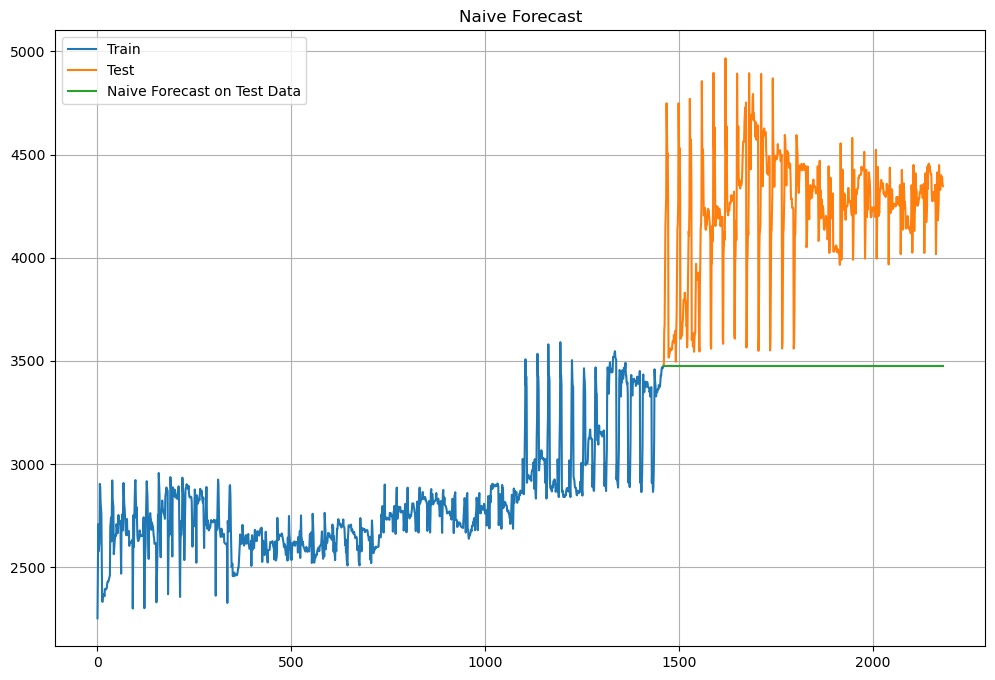

In [664]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['price'], label='Train')
plt.plot(test_data['price'], label='Test')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [671]:
res=res.append(evaluate_forecast(test_data['price'].values,Naive_test['naive'].values))
res.rename(index={0:'Naive_model'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   
Holts winter exponential smoothing with multipl... -2.534393e+00   
Holts winter exponential smoothing with Additiv... -5.118240e+00   
Linear model                                       -1.323470e+02   
Exponential model                                  -1.029708e+02   
Quadratic Model                                    -5.031468e-01   
Additive Seasonality                               -7.930884e+02   
Additive Seasonality Quadratic                     -4.468716e-01   
Multiplicative Seasonality                         -5.878418e+10   
Multiplicative Seasonality                         -8.895152e+02   
Multiplicative Additive Seasonality                -9.070324e+01   
Naive_model                                        -7.942975e+00   
Naive_model                                        -7.942975e+00   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   
Holts winter exponential smoothing with multipl...           189.227922   
Holts winter exponential smoothing with Additiv...          1932.966816   
Linear model                                                 972.083253   
Exponential model                                            963.058406   
Quadratic Model                                              393.146409   
Additive Seasonality                                        1429.156577   
Additive Seasonality Quadratic                               395.909309   
Multiplicative Seasonality                                  4233.301914   
Multiplicative Seasonality                                  1438.973681   
Multiplicative Additive Seasonality                          958.515108   
Naive_model                                                  763.939945   
Naive_model                                                  763.939945   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.640931   
Holts winter exponential smoothing with multipl...             185.607073   
Holts winter exponential smoothing with Additiv...           

# Simple Average

In [673]:
SimpleAvg_train = train_data.copy()
SimpleAvg_test = test_data.copy()
SimpleAvg_test['mean_forecast'] = train_data['price'].mean()
SimpleAvg_test.head()

date   price     t  t_squared month  year  Jan  Feb  Mar  Apr  May  \
1461 2020-01-01  3477.6  1462    2137444   Jan  2020    1    0    0    0    0   
1462 2020-01-02  3649.3  1463    2140369   Jan  2020    1    0    0    0    0   
1463 2020-01-03  3672.8  1464    2143296   Jan  2020    1    0    0    0    0   
1464 2020-01-04  3909.0  1465    2146225   Jan  2020    1    0    0    0    0   
1465 2020-01-05  4145.9  1466    2149156   Jan  2020    1    0    0    0    0   

      Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_price  mean_forecast  
1461    0    0    0    0    0    0    0   8.154098    2812.276523  
1462    0    0    0    0    0    0    0   8.202291    2812.276523  
1463    0    0    0    0    0    0    0   8.208710    2812.276523  
1464    0    0    0    0    0    0    0   8.271037    2812.276523  
1465    0    0    0    0    0    0    0   8.329875    2812.276523

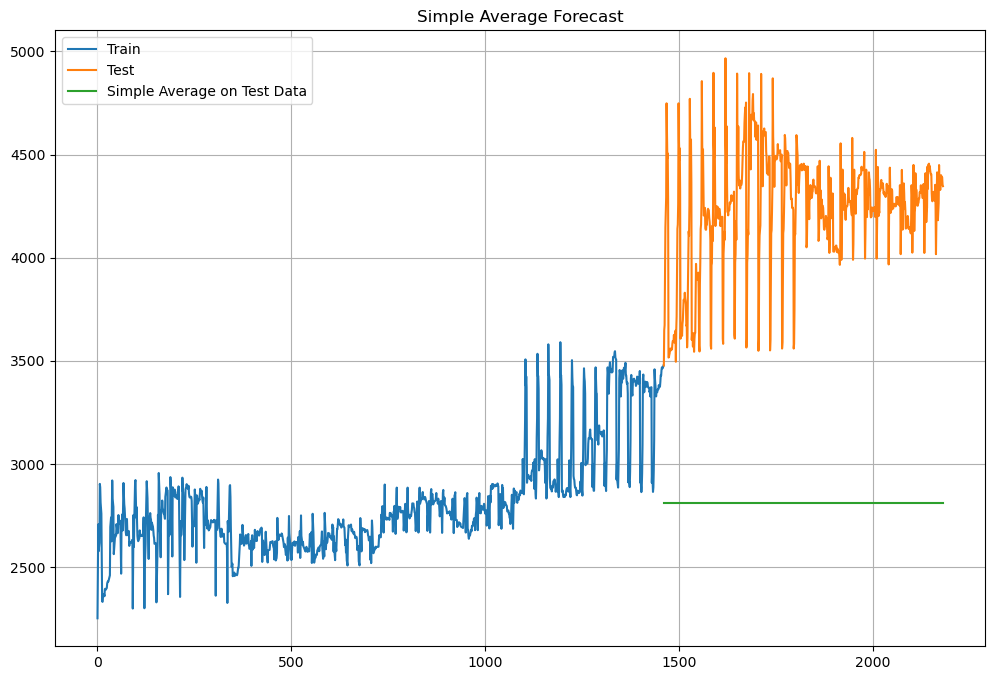

In [674]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAvg_train['price'], label='Train')
plt.plot(SimpleAvg_test['price'], label='Test')
plt.plot(SimpleAvg_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [675]:
res=res.append(evaluate_forecast(test_data['price'].values,SimpleAvg_test['mean_forecast'].values))
res.rename(index={0:'Simple_average'},inplace=True)
res

r2_score  \
Auto Regression                                    -1.052072e+02   
Arima                                              -5.239484e+01   
Arima                                              -5.239484e+01   
Sarima                                             -5.148564e-01   
Tuned_Sarima                                       -3.172980e+00   
Tuned Arima model                                  -1.637446e-01   
Simple Exponential smoothing                       -3.597533e+27   
Holt method (Double Exponential)                   -4.875594e+00   
Holts winter exponential smoothing with additiv... -2.798265e+00   
Holts winter exponential smoothing with multipl... -2.534393e+00   
Holts winter exponential smoothing with Additiv... -5.118240e+00   
Linear model                                       -1.323470e+02   
Exponential model                                  -1.029708e+02   
Quadratic Model                                    -5.031468e-01   
Additive Seasonality                               -7.930884e+02   
Additive Seasonality Quadratic                     -4.468716e-01   
Multiplicative Seasonality                         -5.878418e+10   
Multiplicative Seasonality                         -8.895152e+02   
Multiplicative Additive Seasonality                -9.070324e+01   
Naive_model                                        -7.942975e+00   
Naive_model                                        -7.942975e+00   
Simple_average                                     -2.779118e+01   

                                                    mean_absolute_error  \
Auto Regression                                              945.830254   
Arima                                                        659.370802   
Arima                                                        659.370802   
Sarima                                                        96.922675   
Tuned_Sarima                                                 175.213766   
Tuned Arima model                                             80.128272   
Simple Exponential smoothing                                  83.175301   
Holt method (Double Exponential)                             297.573213   
Holts winter exponential smoothing with additiv...          1444.957736   
Holts winter exponential smoothing with multipl...           189.227922   
Holts winter exponential smoothing with Additiv...          1932.966816   
Linear model                                                 972.083253   
Exponential model                                            963.058406   
Quadratic Model                                              393.146409   
Additive Seasonality                                        1429.156577   
Additive Seasonality Quadratic                               395.909309   
Multiplicative Seasonality                                  4233.301914   
Multiplicative Seasonality                                  1438.973681   
Multiplicative Additive Seasonality                          958.515108   
Naive_model                                                  763.939945   
Naive_model                                                  763.939945   
Simple_average                                              1428.963422   

                                                    median_absolute_error  \
Auto Regression                                                942.346019   
Arima                                                          675.321168   
Arima                                                          675.321168   
Sarima                                                          77.502517   
Tuned_Sarima                                                   168.512165   
Tuned Arima model                                               74.435636   
Simple Exponential smoothing                                    73.400093   
Holt method (Double Exponential)                               295.390340   
Holts winter exponential smoothing with additiv...            1408.64093

# Model 4 - Moving Average

In [676]:
Mvg_Avg = df1.copy()
Mvg_Avg['Trailing_2'] = Mvg_Avg['price'].rolling(2).mean()
Mvg_Avg['Trailing_3'] = Mvg_Avg['price'].rolling(3).mean()
Mvg_Avg['Trailing_5'] = Mvg_Avg['price'].rolling(5).mean()
Mvg_Avg['Trailing_7'] = Mvg_Avg['price'].rolling(7).mean()
Mvg_Avg.head()

price  Trailing_2   Trailing_3  Trailing_5  Trailing_7
date                                                                
2016-01-01  2252.60         NaN          NaN         NaN         NaN
2016-01-02  2454.50    2353.550          NaN         NaN         NaN
2016-01-03  2708.10    2581.300  2471.733333         NaN         NaN
2016-01-04  2577.80    2642.950  2580.133333         NaN         NaN
2016-01-05  2597.75    2587.775  2627.883333     2518.15         NaN

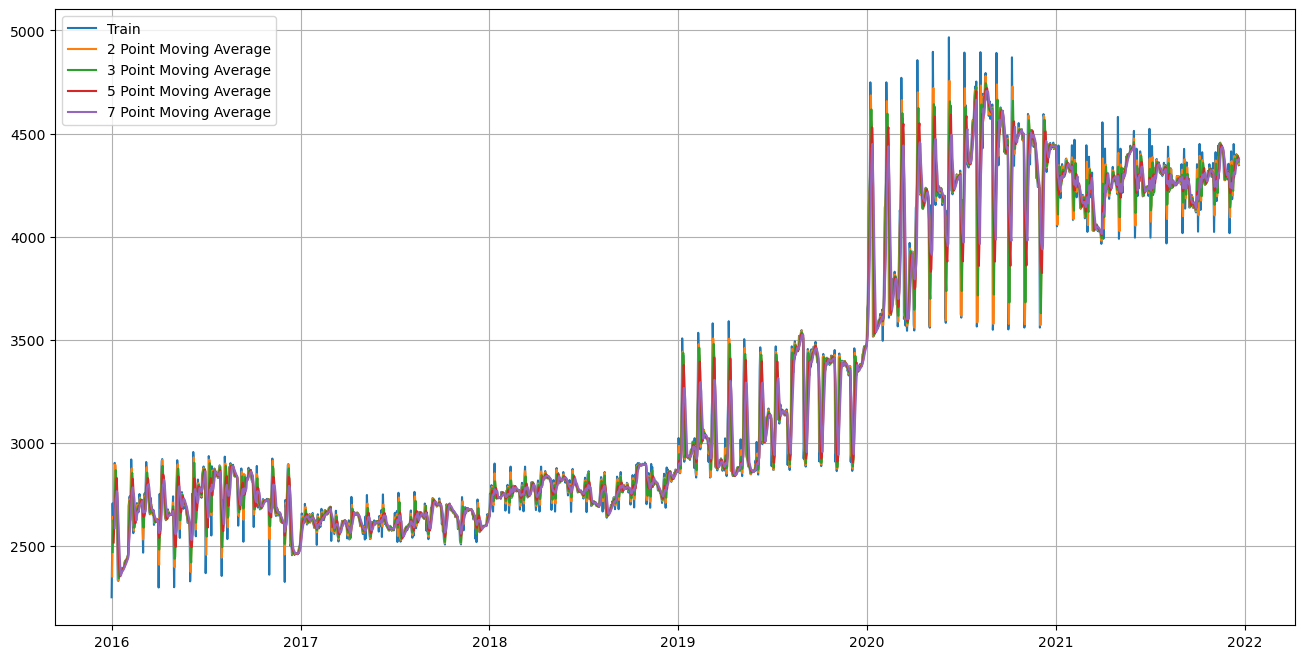

In [677]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(Mvg_Avg['price'], label='Train')
plt.plot(Mvg_Avg['Trailing_2'],label='2 Point Moving Average')
plt.plot(Mvg_Avg['Trailing_3'],label='3 Point Moving Average')
plt.plot(Mvg_Avg['Trailing_5'],label = '5 Point Moving Average')
plt.plot(Mvg_Avg['Trailing_7'],label = '7 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [679]:
size=int(len(Mvg_Avg)*0.9)
size

1963

In [688]:
len(trailing_Mvg_Avg_test)

219

In [680]:
#Creating train and test set 
trailing_Mvg_Avg_train=Mvg_Avg[:size]
trailing_Mvg_Avg_test=Mvg_Avg[size:]

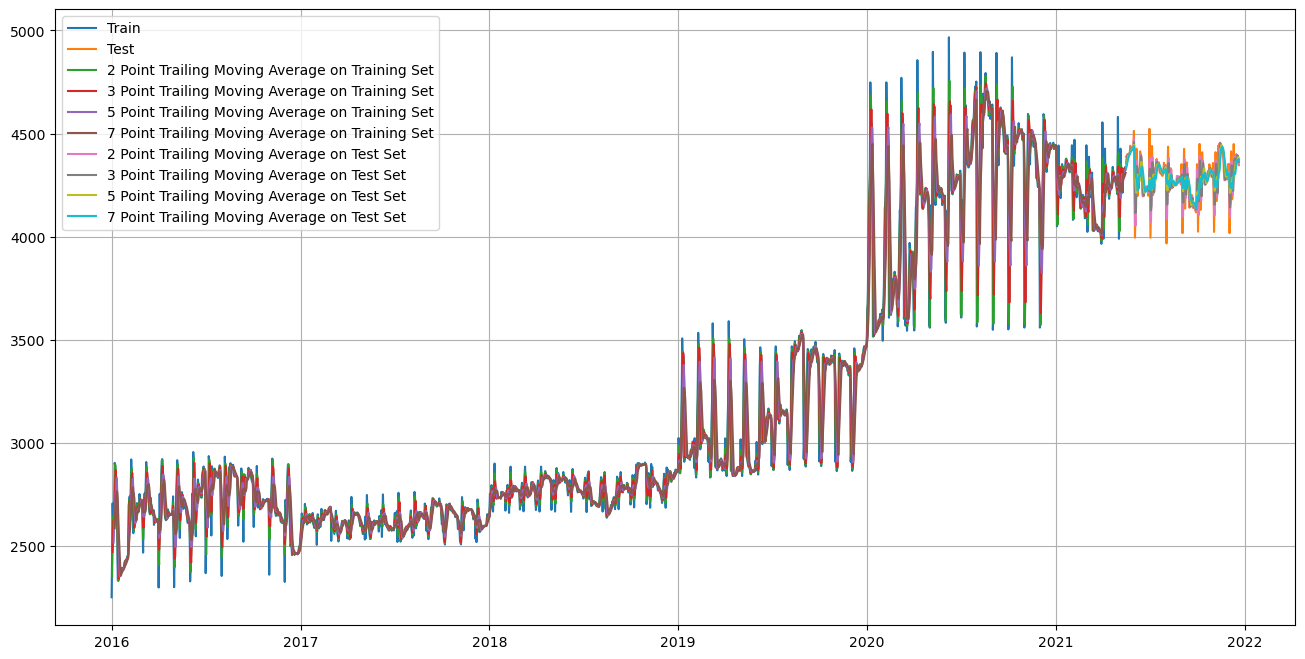

In [681]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_Mvg_Avg_train['price'], label='Train')
plt.plot(trailing_Mvg_Avg_test['price'], label='Test')

plt.plot(trailing_Mvg_Avg_train['Trailing_2'],label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_Mvg_Avg_train['Trailing_3'],label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_Mvg_Avg_train['Trailing_5'],label = '5 Point Trailing Moving Average on Training Set')
plt.plot(trailing_Mvg_Avg_train['Trailing_7'],label = '7 Point Trailing Moving Average on Training Set')

plt.plot(trailing_Mvg_Avg_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Mvg_Avg_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Mvg_Avg_test['Trailing_5'],label = '5 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Mvg_Avg_test['Trailing_7'],label = '7 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [685]:
len(test_data['price'])

721

In [686]:
len(trailing_Mvg_Avg_test['Trailing_2'])

219

In [691]:
res

In [692]:
res = res.append(evaluate_forecast(trailing_Mvg_Avg_test['price'].values, trailing_Mvg_Avg_test['Trailing_2'].values))
res.rename(index={0: 'trailing_Mvg_Avg_test_Trailing_2'}, inplace=True)

res = res.append(evaluate_forecast(trailing_Mvg_Avg_test['price'].values, trailing_Mvg_Avg_test['Trailing_3'].values))
res.rename(index={0: 'trailing_Mvg_Avg_test_Trailing_3'}, inplace=True)

res = res.append(evaluate_forecast(trailing_Mvg_Avg_test['price'].values, trailing_Mvg_Avg_test['Trailing_5'].values))
res.rename(index={0: 'trailing_Mvg_Avg_test_Trailing_5'}, inplace=True)

res = res.append(evaluate_forecast(trailing_Mvg_Avg_test['price'].values, trailing_Mvg_Avg_test['Trailing_7'].values))
res.rename(index={0: 'trailing_Mvg_Avg_test_Trailing_7'}, inplace=True)
res

r2_score  mean_absolute_error  \
trailing_Mvg_Avg_test_Trailing_2  0.784004            29.115982   
trailing_Mvg_Avg_test_Trailing_3  0.524611            40.292542   
trailing_Mvg_Avg_test_Trailing_5  0.366144            52.444018   
trailing_Mvg_Avg_test_Trailing_7  0.391339            50.112394   

                                  median_absolute_error          mse  \
trailing_Mvg_Avg_test_Trailing_2              13.450000  2093.435114   
trailing_Mvg_Avg_test_Trailing_3              17.666667  4607.481035   
trailing_Mvg_Avg_test_Trailing_5              31.360000  6143.344139   
trailing_Mvg_Avg_test_Trailing_7              28.928571  5899.150334   

                                      msle      mape       rmse  
trailing_Mvg_Avg_test_Trailing_2  0.000117  0.006848  45.754072  
trailing_Mvg_Avg_test_Trailing_3  0.000257  0.009476  67.878428  
trailing_Mvg_Avg_test_Trailing_5  0.000341  0.012307  78.379488  
trailing_Mvg_Avg_test_Trailing_7  0.000327  0.011765  76.805926

In [694]:
df1

price
date               
2016-01-01  2252.60
2016-01-02  2454.50
2016-01-03  2708.10
2016-01-04  2577.80
2016-01-05  2597.75
...             ...
2021-12-17  4394.40
2021-12-18  4389.50
2021-12-19  4389.50
2021-12-20  4354.10
2021-12-21  4346.50

[2182 rows x 1 columns]

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [808]:
# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df1)

# Split data into training and testing sets
train_size = int(len(data_scaled) * 0.9)
test_size = len(data_scaled) - train_size
train_data = data_scaled[0:train_size,:]
test_data = data_scaled[train_size:len(data_scaled),:]

In [809]:
# Define function to create dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [814]:
# Create training and testing datasets
look_back = 3
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape datasets for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [815]:
# Define model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, Y_train, epochs=500, batch_size=32, verbose=1)

Epoch 1/500
62/62 [==============================] - 25s 40ms/step - loss: 0.0314
Epoch 2/500
62/62 [==============================] - 2s 27ms/step - loss: 0.0067
Epoch 3/500
62/62 [==============================] - 2s 25ms/step - loss: 0.0064
Epoch 4/500
62/62 [==============================] - 1s 23ms/step - loss: 0.0072
Epoch 5/500
62/62 [==============================] - 2s 24ms/step - loss: 0.0058
Epoch 6/500
62/62 [==============================] - 1s 23ms/step - loss: 0.0062
Epoch 7/500
62/62 [==============================] - 2s 23ms/step - loss: 0.0055
Epoch 8/500
62/62 [==============================] - 2s 32ms/step - loss: 0.0055
Epoch 9/500
62/62 [==============================] - 3s 49ms/step - loss: 0.0053
Epoch 10/500
62/62 [==============================] - 3s 50ms/step - loss: 0.0052
Epoch 11/500
62/62 [==============================] - 1s 22ms/step - loss: 0.0050
Epoch 12/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0045
Epoch 13/500
62/62 [====

Epoch 101/500
62/62 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 102/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0022
Epoch 103/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0023
Epoch 104/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0022
Epoch 105/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0024
Epoch 106/500
62/62 [==============================] - 1s 19ms/step - loss: 0.0024
Epoch 107/500
62/62 [==============================] - 2s 24ms/step - loss: 0.0023
Epoch 108/500
62/62 [==============================] - 1s 20ms/step - loss: 0.0023
Epoch 109/500
62/62 [==============================] - 1s 19ms/step - loss: 0.0021
Epoch 110/500
62/62 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 111/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0024
Epoch 112/500
62/62 [==============================] - 1s 20ms/step - loss: 0.0024
Epoc

62/62 [==============================] - 1s 17ms/step - loss: 0.0022
Epoch 200/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0022
Epoch 201/500
62/62 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 202/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0021
Epoch 203/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0021
Epoch 204/500
62/62 [==============================] - 1s 14ms/step - loss: 0.0022
Epoch 205/500
62/62 [==============================] - 1s 18ms/step - loss: 0.0021
Epoch 206/500
62/62 [==============================] - 1s 18ms/step - loss: 0.0022
Epoch 207/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0022
Epoch 208/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0021
Epoch 209/500
62/62 [==============================] - 1s 19ms/step - loss: 0.0021
Epoch 210/500
62/62 [==============================] - 1s 19ms/step - loss: 0.0024
Epoch 211/500
62/6

62/62 [==============================] - 1s 17ms/step - loss: 0.0020
Epoch 298/500
62/62 [==============================] - 1s 19ms/step - loss: 0.0020
Epoch 299/500
62/62 [==============================] - 2s 30ms/step - loss: 0.0021
Epoch 300/500
62/62 [==============================] - 2s 27ms/step - loss: 0.0020
Epoch 301/500
62/62 [==============================] - 2s 27ms/step - loss: 0.0020
Epoch 302/500
62/62 [==============================] - 1s 21ms/step - loss: 0.0021
Epoch 303/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0020
Epoch 304/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0019
Epoch 305/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0020
Epoch 306/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0019
Epoch 307/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0019
Epoch 308/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0020
Epoch 309/500
62/6

62/62 [==============================] - 1s 16ms/step - loss: 0.0018
Epoch 396/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0019
Epoch 397/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0020
Epoch 398/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0018
Epoch 399/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0018
Epoch 400/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 401/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 402/500
62/62 [==============================] - 1s 23ms/step - loss: 0.0019
Epoch 403/500
62/62 [==============================] - 1s 22ms/step - loss: 0.0019
Epoch 404/500
62/62 [==============================] - 1s 22ms/step - loss: 0.0018
Epoch 405/500
62/62 [==============================] - 1s 21ms/step - loss: 0.0018
Epoch 406/500
62/62 [==============================] - 1s 19ms/step - loss: 0.0019
Epoch 407/500
62/6

62/62 [==============================] - 2s 26ms/step - loss: 0.0019
Epoch 494/500
62/62 [==============================] - 1s 19ms/step - loss: 0.0019
Epoch 495/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0018
Epoch 496/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0017
Epoch 497/500
62/62 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 498/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0018
Epoch 499/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0016
Epoch 500/500
62/62 [==============================] - 1s 16ms/step - loss: 0.0018


In [816]:
# Evaluate model
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score, np.sqrt(train_score)))
print('Test Score: %.2f MSE (%.2f RMSE)' % (test_score, np.sqrt(test_score)))

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse scaling
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

Train Score: 0.00 MSE (0.04 RMSE)
Test Score: 0.00 MSE (0.03 RMSE)
7/7 [==============================] - 0s 7ms/step


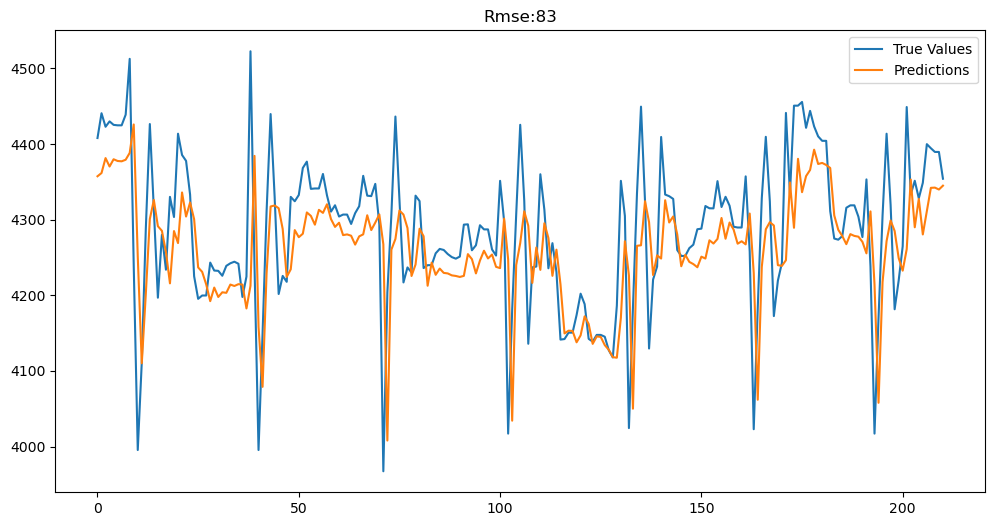

In [817]:
plt.figure(figsize=(12,6))
plt.plot(Y_test.flatten(), label='True Values')
plt.plot(test_predict.flatten(), label='Predictions')
plt.title('Rmse:{}'.format(round(np.sqrt(mean_squared_error(Y_test.flatten(),test_predict.flatten()))),4))
plt.legend()
plt.show()

- From above we can observe that the predictions are very close to actual values also we got rmse around 81,this will best model apart from other data driven and model based 


In [709]:
res = res.append(evaluate_forecast(Y_test.flatten(),test_predict.flatten()))
res.rename(index={0: 'LSTM'}, inplace=True)
res

AttributeError: 'NoneType' object has no attribute 'append'

In [818]:
evaluate_forecast(Y_test.flatten(),test_predict.flatten())

r2_score  mean_absolute_error  median_absolute_error          mse  \
0  0.292391             59.05162              39.812793  6828.291202   

       msle      mape       rmse  
0  0.000378  0.013804  82.633475

# Forcasting Using FB Prophet Model

In [729]:
len(train)

1963

In [741]:
df3=df.iloc[:,:2]
df3

date    price
0    2016-01-01  2252.60
1    2016-01-02  2454.50
2    2016-01-03  2708.10
3    2016-01-04  2577.80
4    2016-01-05  2597.75
...         ...      ...
2177 2021-12-17  4394.40
2178 2021-12-18  4389.50
2179 2021-12-19  4389.50
2180 2021-12-20  4354.10
2181 2021-12-21  4346.50

[2182 rows x 2 columns]

In [742]:
train_fb=df3[:1963]
test_fb=df3[1963:]

In [747]:
train_fb

ds        y
0    2016-01-01  2252.60
1    2016-01-02  2454.50
2    2016-01-03  2708.10
3    2016-01-04  2577.80
4    2016-01-05  2597.75
...         ...      ...
1958 2021-05-12  4306.80
1959 2021-05-13  4308.50
1960 2021-05-14  4333.10
1961 2021-05-15  4336.70
1962 2021-05-16  4336.70

[1963 rows x 2 columns]

In [754]:
from prophet import Prophet

# Assuming you have the train and validation data as separate DataFrames
train_data = train_fb.rename(columns={"date": "ds", "price": "y"})
valid_data = test_fb.rename(columns={"date": "ds", "price": "y"})

In [807]:
valid_data.head()

ds       y
1963 2021-05-17  4387.9
1964 2021-05-18  4386.1
1965 2021-05-19  4397.9
1966 2021-05-20  4400.6
1967 2021-05-21  4399.4

In [805]:
# Initialize and fit the Prophet model
model = Prophet(changepoint_prior_scale=0.05, seasonality_mode='additive')
model.fit(train_data)

# Make predictions for the validation period
future = model.make_future_dataframe(periods=len(valid_data))
forecast = model.predict(future)

# Extract the forecasted values for the validation period
forecast_valid = forecast[-len(valid_data):]

# Print the forecasted values for the validation period
print(forecast_valid[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

20:54:41 - cmdstanpy - INFO - Chain [1] start processing
20:54:41 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat   yhat_lower   yhat_upper
1963 2021-05-17  4300.485846  4073.114764  4525.801639
1964 2021-05-18  4306.042244  4078.419977  4537.299409
1965 2021-05-19  4309.512023  4082.523091  4519.476081
1966 2021-05-20  4312.494574  4082.899638  4529.720189
1967 2021-05-21  4310.908595  4094.294622  4546.501030
...         ...          ...          ...          ...
2177 2021-12-17  4284.390461  3989.933438  4562.831901
2178 2021-12-18  4295.162031  3976.937989  4583.981041
2179 2021-12-19  4300.271177  4008.758062  4590.988171
2180 2021-12-20  4309.487241  4025.030031  4607.751924
2181 2021-12-21  4322.509318  4020.413388  4599.922067

[219 rows x 4 columns]


In [806]:
evaluate_forecast(forecast_valid.yhat,valid_data.y)

r2_score  mean_absolute_error  median_absolute_error           mse  \
0  -7.08507           123.638869              103.19919  22746.707353   

       msle      mape        rmse  
0  0.001234  0.028159  150.820116

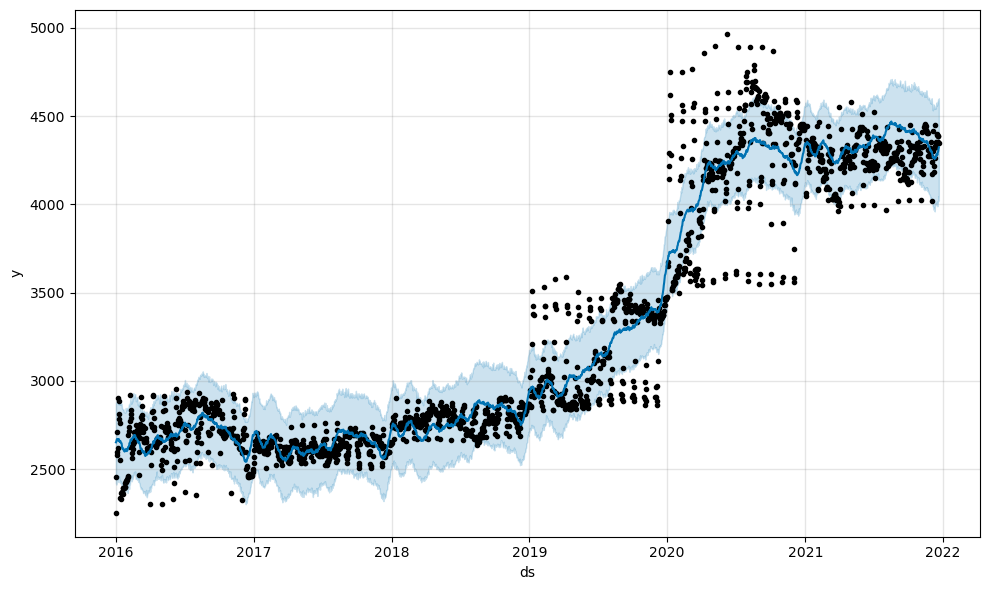

In [799]:
fig=my_model.plot(forecast, uncertainty=True)
fig.show()

In [ ]:
res = res.append(evaluate_forecast(forecast_valid.yhat,valid_data.y) )
res.rename(index={0: 'FB Prophet'}, inplace=True)
res